In [1]:
import os
import json
from tqdm import tqdm

print("开始加载分析集结果")
# data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_stats_origin.jsonl"
data_path_result = os.environ.get('HOME') + "/cook-data/recipe_corpus_ana_stats.jsonl"
f1 = open(data_path_result, 'r', encoding='utf-8')
result = []
for line in tqdm(f1.readlines()):
    result_line = json.loads(line)
    result.append(result_line["__dj__stats__"])
print("加载分析结果集结束")
print("分析结果集大小：", len(result))
result[0]

开始加载分析集结果


100%|██████████| 1049218/1049218 [00:06<00:00, 152039.05it/s]

加载分析结果集结束
分析结果集大小： 1049218


{'alnum_ratio': 1.0,
 'char_rep_ratio': 0.0,
 'lang': 'zh',
 'lang_score': 0.9015420675,
 'perplexity': 5107.6,
 'text_len': 7}

In [2]:
import pandas as pd
df = pd.DataFrame(result)
df.head()

,alnum_ratio,char_rep_ratio,lang,lang_score,perplexity,text_len
0,1.0,0.0,zh,0.901542,5107.6,7
1,1.0,0.0,zh,0.851976,7772.0,8
2,1.0,0.0,zh,0.764956,9754.6,8
3,1.0,0.0,zh,0.834716,8572.6,8
4,1.0,0.0,zh,0.875503,3468.7,9


In [3]:
describe = df.describe()

In [4]:
from matplotlib import pyplot as plt

def plot_hist(df, column_name, max_label, step):
    label_count = [0] * int(max_label / step)
    x_list = [i for i in range(int(max_label / step))]
    x_list = [i * step for i in x_list]
    for i in tqdm(range(len(df))):
        if int(df[column_name][i]) < max_label:
            label_count[int(df[column_name][i]/step)] += 1
        else:
            label_count[-1] += 1
    print("label_count: ",label_count)
    plt.bar(x_list, label_count)
    plt.xlabel(column_name)
    plt.ylabel("count")
    plt.xlim(0, max_label)
    plt.tight_layout()
    plt.show()

In [5]:
def analyze_result(df, column_name, max_label, step):
    print(column_name + " mean: ", describe[column_name]["mean"])
    print(column_name + " std: ", describe[column_name]["std"])
    print(column_name + " 3-σ left: ", describe[column_name]["mean"] - 3 * describe[column_name]["std"])
    print(column_name + " 3-σ right: ", describe[column_name]["mean"] + 3 * describe[column_name]["std"])
    plot_hist(df, column_name, max_label, step)

alnum_ratio mean:  0.9464852291879078
alnum_ratio std:  0.08482089617826599
alnum_ratio 3-σ left:  0.6920225406531098
alnum_ratio 3-σ right:  1.2009479177227058


100%|██████████| 1049218/1049218 [00:13<00:00, 78444.83it/s] 


label_count:  [1, 61, 389, 593, 660, 1938, 6768, 52841, 206795, 779172]


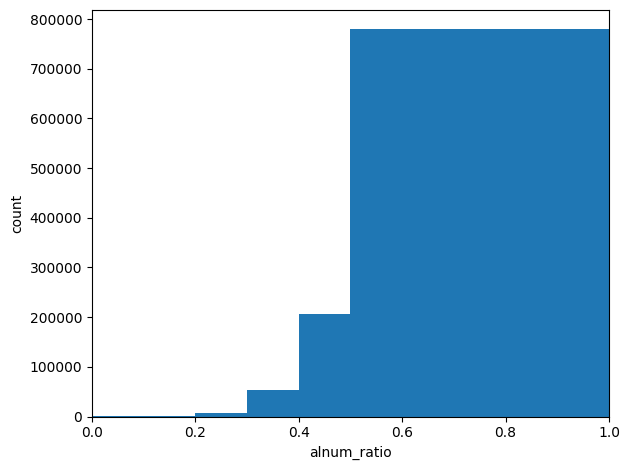

In [6]:
analyze_result(df, "alnum_ratio", 1, 0.1)

char_rep_ratio mean:  0.0002779865583398303
char_rep_ratio std:  0.011166306245029964
char_rep_ratio 3-σ left:  -0.03322093217675006
char_rep_ratio 3-σ right:  0.03377690529342973


100%|██████████| 1049218/1049218 [00:12<00:00, 84555.66it/s]


label_count:  [1048445, 134, 164, 132, 138, 121, 63, 17, 4, 0]


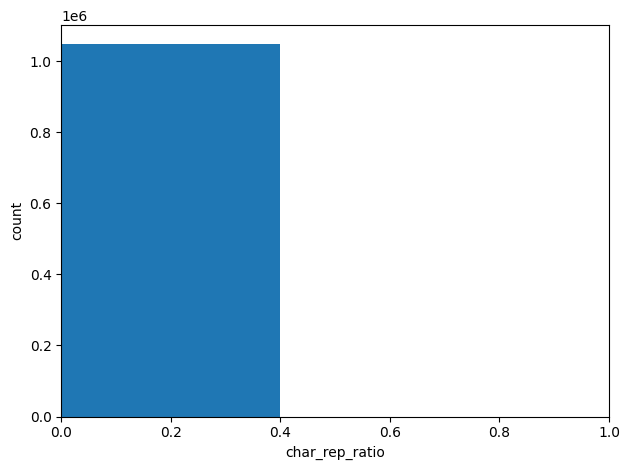

In [7]:
analyze_result(df, "char_rep_ratio", 1, 0.1)

lang_score mean:  0.6950051359370427
lang_score std:  0.23730766636807013
lang_score 3-σ left:  -0.0169178631671677
lang_score 3-σ right:  1.406928135041253


100%|██████████| 1049218/1049218 [00:12<00:00, 86117.16it/s]


label_count:  [877, 22822, 57082, 72031, 83846, 122869, 122086, 130844, 156631, 280130]


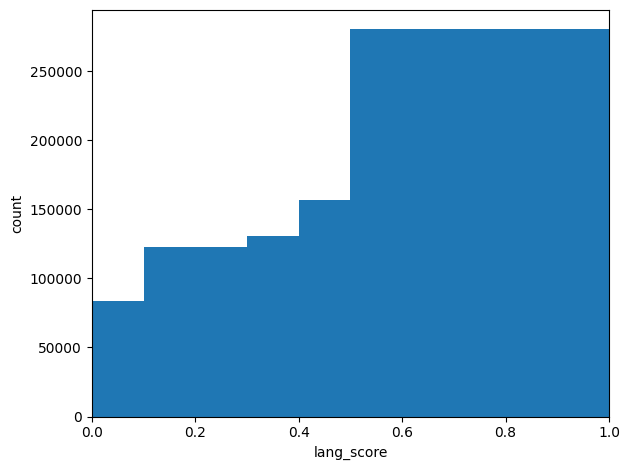

In [8]:
analyze_result(df, "lang_score", 1, 0.1)

perplexity mean:  3151.623771227714
perplexity std:  4717.97190203729
perplexity 3-σ left:  -11002.291934884157
perplexity 3-σ right:  17305.539477339586


100%|██████████| 1049218/1049218 [00:14<00:00, 74216.23it/s]


label_count:  [272586, 294416, 165233, 95491, 58840, 38950, 26763, 19067, 14259, 10953, 8349, 6617, 5364, 4326, 3697, 2972, 2467, 2176, 1831, 14861]


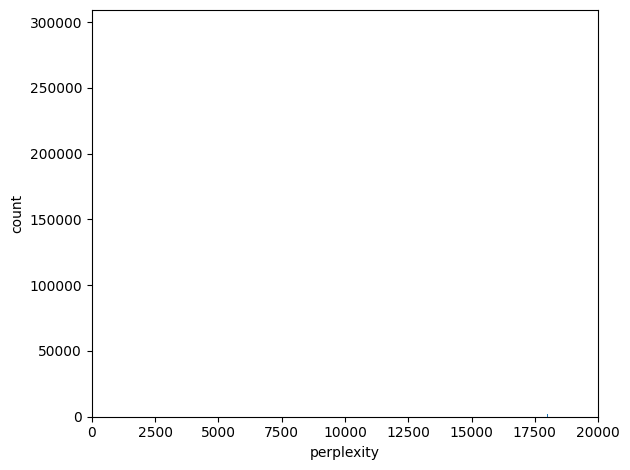

In [9]:
analyze_result(df, "perplexity", 20000, 1000)

text_len mean:  9.864677312055264
text_len std:  5.966337480120818
text_len 3-σ left:  -8.034335128307191
text_len 3-σ right:  27.76368975241772


100%|██████████| 1049218/1049218 [00:12<00:00, 85957.95it/s]


label_count:  [636351, 346356, 52899, 9859, 2386, 713, 316, 118, 71, 149]


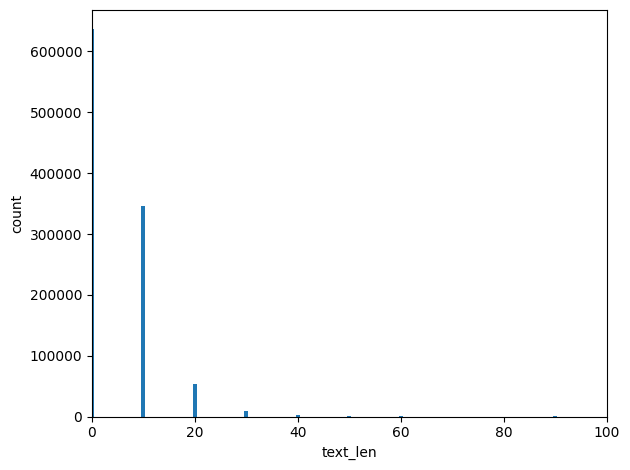

In [10]:
analyze_result(df, "text_len", 100, 10)

In [11]:
print("开始加载数据集")
data_path_juicer = os.environ.get('HOME') + "/cook-data/recipe_corpus_dedup.json"
f2 = open(data_path_juicer, 'r', encoding='utf-8')
json_data = []
# data juicer在保存时，以1000条数据为一组，每组数据单独保存在一行
# 所有这里需要两重循环
for line in f2.readlines():
    for recipe in json.loads(line):
        json_data.append(recipe)
print("加载数据集结束")

开始加载数据集
加载数据集结束


In [12]:
count_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang in count_dict:
        count_dict[lang] += 1
    else:
        count_dict[lang] = 1
print(count_dict)

100%|██████████| 1049218/1049218 [00:06<00:00, 152247.52it/s]

{'zh': 739294, 'ja': 192310, 'en': 49461, 'sr': 3321, 'ko': 9874, 'fi': 941, 'ur': 47, 'it': 6712, 'pt': 2335, 'de': 5267, 'vi': 1124, 'ru': 3287, 'tr': 2183, 'be': 43, 'sk': 55, 'fa': 1029, 'fr': 7978, 'as': 6, 'hu': 1472, 'wuu': 996, 'nl': 351, 'es': 3996, 'eo': 1062, 'el': 1403, 'ta': 672, 'mk': 803, 'ceb': 2329, 'pl': 1413, 'ca': 570, 'tt': 97, 'hr': 340, 'eu': 236, 'te': 82, 'ms': 266, 'cs': 425, 'he': 305, 'ml': 118, 'hy': 278, 'bg': 223, 'kn': 116, 'is': 31, 'sv': 654, 'id': 430, 'uk': 633, 'my': 294, 'mr': 114, 'la': 34, 'no': 204, 'ar': 233, 'als': 30, 'lo': 9, 'af': 27, 'war': 93, 'ast': 4, 'sh': 277, 'sq': 44, 'hi': 154, 'gl': 84, 'ilo': 27, 'uz': 40, 'ro': 511, 'et': 68, 'da': 223, 'lt': 241, 'pa': 57, 'bn': 38, 'br': 31, 'gu': 67, 'ia': 139, 'ka': 229, 'th': 279, 'jv': 9, 'tg': 21, 'si': 24, 'sl': 162, 'sco': 7, 'kk': 32, 'or': 14, 'yue': 111, 'nds': 60, 'fy': 2, 'tl': 45, 'cv': 11, 'oc': 100, 'an': 11, 'lrc': 1, 'bs': 23, 'ba': 16, 'az': 97, 'lv': 57, 'dv': 8, 'nn': 24, '

In [13]:
lang_list_dict = {}
for i in tqdm(range(len(df))):
    lang = df["lang"][i]
    if lang not in lang_list_dict:
        lang_list_dict[lang] = []
    lang_list_dict[lang].append(i)

100%|██████████| 1049218/1049218 [00:07<00:00, 145875.64it/s]


In [14]:
n = 10
lang = 'en'
for i in range(n):
    print(json_data[lang_list_dict[lang][i]]['name'])

10寸披萨，鸡蛋面饼
零失败8寸蛋糕
抹茶色斑马戚风8寸蛋糕
“隔水法”8寸酸奶蛋糕，轻乳酪蛋糕的口感
BBQ烤鸡
BBQ烤鸡翅
BBQ烤鸡串
Q弹鸡蛋羹
杂
陷


In [15]:
for i in tqdm(range(len(df))):
    if df["perplexity"][i] > 20000:
        print(json_data[i]['name'])

  2%|▏         | 16058/1049218 [00:00<00:06, 160182.97it/s]

6寸8寸10寸戚风蛋糕
红配绿4寸小蛋糕
6寸蛋糕坯
6寸蛋糕坯子
6寸蛋糕家用
6寸蛋糕模面包
古早6寸蛋糕
6寸蛋糕 古早味
6寸蛋糕胚+裱花（最简单的步骤）
戚风8寸蛋糕胚
8寸蛋糕裱花奶油
8寸蛋糕巧克力淋面
赤丼
炝虾
捆粄
𠧧鸭
尖饺
醂柿
葛粑
青饺
饹豆
捆膀
炝藕
自炊
馄炖
木槺
煳肘
灰糍
艾馃
姜拌藕
紫薯酥
红龟粿
黑愣愣
牛轧饼
黄蟮面
红薯稀
二块粑
搅拿糕
艾龟糕
红薯兜
姜枣膏
炖鳗鲞
汆丸汤
鲞扣鸡
牛扒饭
菇燥饭
双茄煲
青柠蜜
华芙饼
西葫饼
红焖虾
大馍馍
红薯烙
炝海螺
海鲜丼
戈芋饭
搅搅糖
姜葱虾
海鲜烩
K冰粽
紫薯糊
青柠醋
红焖鸭
紫薯盆
海粝煎
龙猫挞
清炒藕
青芥虾
碌鸭肶
牛烂呼
炝藕丁
青柠挞
炝活虾
烀面蛤
东啵肉
红苕酢
尖尖饭
牛脾粥
青柠虾
马碲糕
【菊】
红鲟粥
田艾籺
姜焖鸭
海蠣煎
扎腻头
紫薯挞
姜汁饭
双柠蜜
红薯炸
烀豌豆
白蛤粥
籼子粥
啫鸡煲
姜椒鸭
美颜粥
红麯饭
海蛎咸
炝西葫
姜闷鸭
炝粉丝
青柠茶
波萝鸭
红薯糊
牛轧酥
古粽籺
青柠膏
馋嘴猫
姜闷藕
双臭煲
细米粽
炝蛏鼻
木桶酥
葛焖鸭
炝明虾
木槺杯
万煎糕
煎糄粑
姜炝鸭
双茄烩
海愣蹦
尖尖粽
泰榴芒
紫苷蓝
清肠粥
紫薯粽
红薯脆
阿叁虾
海蛎粥
四臭煲
黑粉稞
海蜊煎
紫薯膏
红薯挞
囟鸭翅
揪四呲
饺仂糍
海鲜粽
红薯焗
小馄炖
双糕粿
红薯粿
烀牛肉
田鸡煲
齣菊饼
饹炸饸
拌鸭胗
四鲜饺
红蟳粥
清煲羊
紫薯奶糕
沙姜煲鸡
四宝焖饭
清炒藕尖
红枣煨肘
红扣羊腩
【卤味】
木须时蔬
清炒百合
红酒猪扒
青椰咖啡
姜仔焖鸭
啫啫鱼煲
双椒豆腐
本帮酱鸽
木桶珍菌
白灼筒篙
红枣馍馍
八寸戚风
X脆薯格
姜葱炒蚬
元宝馄炖
姜汁芹黄
紫薯蒸团
海鲜烩锅
红烩牛脯
呛鲜蔬粒
西柚沙拉
Q润戚风
双橙戚风
清烹茄条
陈醋蛰头
美极大虾
姜葱牛肉
海鲜烩粉
麽麽喳喳
姜焖鸭腿
清炒洋茄
松软面包
家乡焖鹅
西柚冻冻
清炒芍尖
石烹鸭肠
双椒鸭胗
家乡焖鸭
红椒牛肉
双椒藕条
啫啫鸡煲
青柠檬蜜
清炒腰蛤
双椒藕丁
口味嗦螺
大馅馄饨
炝汁鲜鱿
“金”饼
清炒茄块
清炒藕杆
紫薯葡萄
三丝藜蒿
三丫苦粄
“福”羹
红薯坨坨
欧蕾面包
清炖笋汤
M6战斧
美极烤虾
辣糟鸭胗
黑椒双菇
蒸“阳”
黄笋闷鸡
夏凉什蔬
L

  3%|▎         | 33071/1049218 [00:00<00:06, 165115.22it/s]

双椒戏藕
红薯麦芬
青柠薄荷
清焖划鱼
炝炒松柳
双焖茄条
焗鸭焖鸭
陈醋蛰皮
范爷辣翅
双椒蒸翅
紫薯酥球
紫苏木瓜
美极蛇碌
西柚蛋糕
油炸蛎虾
姜酒红蟳
两人餐❀
姜煲豆腐
清炖羊脚
清炖红蛤
沙姜篜鸡
清炒芋梗
小馋兔丁
红焖鲩鱼
大蛤馄炖
馋嘴风爪
清炒蒜肠
仔姜闷兔煲
清炒绿番茄
紫薯芝士饼
紫薯芒果球
高钙奶酪饼
紫薯糯米羹
熘素柴把鸭
乌鸡参杞汤
红烧鮸鱼鲞
黄糖柠檬膏
美极油淋虾
清蒸沙鳗鲞
“烤”红薯
自制冻豆腐
红薯芝士饼
啫啫鱼头煲
自制柠檬膏
红酒烩翅根
大葱滚豆腐
馄炖皮烧卖
西柚柠檬蜜
【蒸三样】
姜葱炒脆鲩
双椒干瘪鸡
南姜蒸嫩鸡
海鲜冻豆腐
阿馥奇朵～
Ra版桃酥
青萝卜虾汤
掐菜拌蛰皮
【酸梅鸭】
吉烈甘蔗虾
红萝卜戚风
红萝卜面包
西柚雪梨汁
Q弹肉蛋丸
“桂笼包”
紫薯Q心馅
红薯茶巾绞
黑糯米蛋糕
夏凉蔬菜冻
奇亚籽戚风
红焖香槟鸭
白芝麻桃酥
松仁蜂蜜挞
红酒烩泥肠
西柚蜂蜜酱
美芹牛肉靡
青菜烩牛肉
啫啫鲟鱼煲
红薯玉米饭
清炒线辣椒
清炖黄鲴鱼
白萝卜煨虾
炝炒萝卜缨
红薯烤芝士
红薯椰蓉球
椰子浸蠄蛤
大“杏”酱
【手剥笋】
美颜玫瑰醋
红薯玉米脆
自制咸呛蟹
双腊蒸双丝
慢嚼蟛蜞螯
红薯糯米棒
黑椒蒸牛肉
清炒糯玉米
黑枣柠檬蜜
清·鸭丁粥
毛豆笋塌饼
西柚蜂蜜茶
红酒炒双蛤
红椒牛肉酱
青豌豆浆汤
紫薯吉祥包
清炒羊脸肉
熟醉熟醉～
青柠拌牛腱
黑椒煸虾禄
元气炖鸭煲
姜葱烤双鸽
红萝卜闷饭
沙姜焖鸭翅
“圣诞树”
红焖羊寸排
青萝卜炖虾
双菌拼豆腐
【酸奶碗】
双椒烩蘑菇
梅汁金柠饮
清炒蒲公英
香菠咕唠肉
【心太软】
梅酱焗猪柳
”焊“粽子
笋馅鼠菊粿
紫薯草莓球
海蟹蔬菜煲
美极蛇碌煲
煲姜柠乐～
自制柠檬蜜
红薯椰蓉饼
姜酒鸡汁煲
爆“料”
美白祛斑霜
清炒水萝卜
啫啫滑鸡煲
姜汁黄闷鸡
平菇炒鲜蔬
紫薯玉米饭
西柚雪梨羹
龙猫挤挤包
吮指冻豆腐
清焗濑尿虾
啫啫蝶鱼煲
自制枣姜膏
美极盐酥虾
清炒苤蓝丝
“青”汁儿
清甜蜜柚派
红酒水果冻
富笋烤花生
上海咸岁饭
酱拌柠香虾
紫薯苹果饮
妗子炒蛤蛋
双莓冰淇淋
大葱豚肉丼
“魔法”包
炝炒萝卜樱
奶酪焗鲜蔬
红薯芝士包
双椒豆腐盒
松软碱面包
姜葱蒸皖鱼
【冻豆腐】
青萝卜呱哒
《酱焖鸭》
金蒜烤血鳗
紫贝芝士饼
红酒烩猪扒
梛汁燕窝捞
红糖鼠粬粿
紫薯

  5%|▍         | 49582/1049218 [00:00<00:06, 144804.94it/s]

Q弹钵子糕
西芹炒鸭脯
紫薯香芋馅
自制糟辣椒
美极馋嘴虾
白蟹烧粉丝
【开口酥】
“花”面包
青橘柠檬蜜
海砺豆腐煎
青柠檬蛋糕
【腊肠酱】
红酒煨草鹅
青菜炕豆腐
海鲜咖哩饭
华道夫沙拉
红绿爆鸭肫
三椒爆鸭肫
姜葱炒猶獴
清炖波尔羊
青柑柠檬蜜
Q弹马碲糕
泰风芒果虾
双莓拿破仑
【酱大骨】
南雄饺俚糍
Q趣香蕉棒
【火腿粽】
金桔椰蓉饯
西柠拌牛展
双豆焖凤爪
青蒜豆腐泡
紫薯早歺卷
【虾扯蛋】
清爽小馄钝
天贝蔬塌饼
红酒胭脂藕
红焖姜康鸡
姜蜜草莓饮
青柠拌文蛤
红油小馄炖
自制姜枣膏
姜葱炒冬蟹
紫薯奶油冻
自制宠物垫
海虹炒茭瓜
藕粉“羹”
双菇炒海蚬
豚汁鲜蔬煲
紫薯水晶丸
沙姜蚝皇鸡
紫薯厚牛奶
咿鸭咿鸭哟
马粟豆沙拉
双椒爆鸭胸
大海螺馄饨
紫糯米面包
白汁烩蘑菇
红薯卷面包
【椒盐虾】
“煲仔”饭
青柠茉莉茶
“炒”酸奶
清炒鲜百合
【蛋裹馍】
泰酱芒果虾
双椒爱牛肉
鲜拌嘎嘣虾
紫薯椰蓉饼
8寸寿蛋糕
青蒜熘肥腸
小葱闷蚝蛎
自制早餐肠
红酒烩雪梨
青柠薄荷饮
上海冷馄饨
红薯棒面粥
小蜗牛面包
双椒蒸豉排
紫薯爆浆饼
万缕千丝虾
白萝卜炒梨
【太平面】
蛋煎“饺”
黄瓜拌鸭胗
电炖盅焖饭
黑椒烤时蔬
小葱炒鹅血
红薯粒蛋糕
博山酸糊嘟
美极泡萝卜
酱煮猪横脷
自制鲜椰蓉
Kk成长录
啫啫鲶鱼煲
【肉糊辣】
红薯庥酱条
三葱焗中虾
酱焖鲐鲅鱼
T宝早餐汇
仔姜焖鸭煲
姜葱炒鲜蚝
牛杂萝卜煲
青柠碰蜂蜜
啫啫芥兰煲
黑椒嫩牛肉
姜葱焗猪扒
清炝小鲜鱿
蜜渍苦姑茑
黑椒芝士虾
姜片炖鸭肫
清炒萝卜缨
美极炝腰片
海鲜菌汤烩
【红焖羊】
红薯芝士汤
紫薯芝士包
白水手撕兔
双莓芝士挞
【芽菜面】
家熬鳎鰢鱼
金蒜长寿叶
青芥沙拉虾
清炒石头菇
黄金鸡蛋饭
自制的味道
红薯面包
黑椒牛仔饭
清炒文武笋
双丝炝龙耳
练习教室～
海鲜烩鱼锅
【凤梨冻】
双椒蒸牛肉
白萝卜莲花
大枣糯米粽
西柚茉莉茶
青菜碎豆腐
西芹炒鸭肫
《椰丝粑》
清心润燥饮
胡葱笃豆腐
清炒松柳芽
泰辣香草鸡
【莫里の】
紫薯蜂蜜奶
清炖汪丫鱼
奇亚籽面包
青萝卜馅食
福气老鼠酥
姜葱花生盐
清䃼凉糖水
青柠雪梨水
自制猫饭～
自制汉堡胚
红焖羊腩煲
三杯鳝筒煲
自制牛肉脯
清炒老豌豆
自制陀粉粑
红鲟蒸粉丝
【酸奶杯】
青菜肉沫粥
《茄子盒》
紫薯玉米粽
“菱角”羹
姜葱炒蚬肉

  8%|▊         | 81661/1049218 [00:00<00:06, 153565.49it/s]

龙利番茄煲
炝炒皇帝螺
双蔬蒸双肠
三蔬熘鹿鲜
烤“褐菇”
紫薯糊塌饼
白萝卜咸饭
【辣椒油】
海蛎豆腐咸
青炒莴芛丝
啫啫猪肠煲
双味蝴蝶虾
黄鱼鲞焖饭
黑椒吮指虾
青葱拌云丝
~食韵~
6寸柠檬挞
红薯椰蓉糕
三椒美容蹄
彝族坨坨鸡
红酒烩鸭胸
青菜烩肉圆
“百财”包
青蒜牛肉丝
紫薯面包
【奶茶酱】
香草糖酥饽
美肤去痘汤
高汤烩双笋
黄皮特饮～
赤豆白玉糕
黑椒玉米笋
清补润燥汤
红薯炒乳瓜
三豆消斑饮
三丝氽豆腐
【糯米蛋】
三椒鸡汁煲
紫薯Q心酥
清炒鳘鱼肚
红焖蒜子鳝
海虾焗粉丝
阿胶姜枣膏
梅汁脆脘鱼
鲁味酿花生
如果云知道
“素熊掌”
清甜凉薯汁
馍馍加里脊
红焖花锦鳝
奇亚籽沙拉
姜酒焗鸭胗
客家浀酒粄
红薯软面包
红酒猪踭肉
紫薯芝士丸
清烹沙半鸡
清酒煮蛤蛎
金镶白玉嵌
自制辣鸭货
桑杏猪肺煲
【芋头丸】
姜蒜爆海虾
萝卜焖羊腩
红烩冻豆腐
掐菜爆腰丝
清炒红笕菜
紫薯蜂蜜包
陈醋鸭鸭
紫薯蜜枣粥
三干炣豆腐
黑醋炒什菌
红薯玉米丸
紫薯软面包
牛脖骨汤～
紫薯萝卜卷
红薯苹果饼
海参馄炖馅
双莓卷软欧
阿华田啵啵
红酒翅排煲
姜汁无筋豆
莆田“饼”
【一人食】
【鲜椒鱼】
白萝卜虾糕
清炖开凌梭
紫薯椰榕球
海鲜时蔬煲
果汁果汁～
~黄金饭~
黑椒烤虾串
特色烤鲜鱿
松茸煎金蚝
陈皮萝卜盅
【蒸·饭】
双椒豆腐泡
红焖猴菇排
青蒜苤蓝丝
沙姜啫啫鸡
石锅蒜焗虾
清热润燥汤
【炒凉粉】
吮指盐烤虾
清烧腐衣包
双椒煸仔排
༄芒果冰༄
紫薯鉢仔糕
小猪菠箩包
清炒篙子杆
【拿破仑】
红薯泡泡糕
西柚芒果饮
黑椒滑鸡煲
海鲜氽豆腐
自制龟凝膏
清炒嫩玉米
【腌苦瓜】
沙姜焗猪舌
黑发养颜膏
清炖椰子鸽
四鲜时蔬饺
紫薯星星包
小葱拌锟钝
紫薯丑耳汤
牛扒怎么煎
“火腿”粥
芝士焗茭瓜
红蘑炖笨鸡
红椒配牛肉
姜葱炒皖鱼
黑椒柠檬鸡
清炒窝瓜秧
自种油葵苗
小倩烹小鲜
红玫瑰面包
紫薯椰蓉包
自蒸葡萄酒
粉丝肉沫馅
【友•记】
黄酒笋焖鸭
西葫素陷饼
销魂鸭腿饭
原创嘎蹦脆
姜葱炒飞蟹
红酒烩鸭腿
八寸胚蛋糕
储存山苜楂
“三杯”鸡
紫苏蒸塘鳋鱼
美美哒泡春蒜
紫薯软欧面包
烘隆～隆～焙
大燕条疏残盏
柯基抖臀蛋糕
八寸可可戚风
八寸戚风蛋糕
黑布林冰淇淋
“川”心凉粉
自制辣片辣棍
清熘手剥虾仁
海鲜瑶柱焗饭
西葫芦烩番茄
“大厨”豆腐
8寸可可

  9%|▉         | 99190/1049218 [00:00<00:05, 160260.84it/s]

紫薯泥蛋糕～
【茭白闷蛋】
芝士焗番茄盅
美貌腌水萝卜
日本豆腐焖虾
青柠蜂蜜冰饮
【煎北瓜拖】
红薯芝麻脆条
红酒可可戚风
番汁焗虾皇饺
自制樱桃饮料
泰汁生拌番茄
沙姜贵妃豆腐
海鲜鲜虾焗饭
自做樱桃饮料
美国队长蛋糕
Q润香蕉戚风
紫薯太阳果盅
紫薯蜂蜜戚风
【粉蒸豇豆】
Q弹鱼丸丸丸
馋嘴呱呱田鸡
双茄脆衣豆腐
冬阴“功”汤
一“墨”两吃
三丝炒猪板筋
黑米猪扒汉堡
【绝命鸭掌】
6寸糯米蛋糕
黄杏樱桃面包
Q弹蛋糕8寸
家乡秘制艾籺
石橄榄煲猪肺
自制“辣条”
【西芹百合】
“焦”糖奶茶
“味”爱而生
青椒番茄肉沫
高钙嘭嘭蛋糕
大长沙口味虾
小美～粥集合
“雪山翠林”
红薯菌菇炊饭
红肠萝卜焖饭
“知识”蒸蛋
矜宸•炝河虾
青瓜柠檬沁饮
【糖烤板栗】
青檸花椰沙拉
【爪爪冰棍】
酱渍樱桃萝卜
xo酱炒长豆
～圣诞火鸡～
双椒脆辣鸭胗
红薯“曲奇”
青柠檬腌花螺
紫薯时蔬焖饭
双椒牛肉丝
清肺石橄榄汤
【牛扎饼干】
烤虾芝士焗虾
红薯苹果面包
清炒山芋梗梗
六寸可可戚风
红薯蛋糕
原创☞山粉饼
啥啥啥都记录
【酱蘸猪蹄】
梅汁樱桃萝卜
阿斯蒂芬艾尔
一“包”两吃
【鎏釜】咸粥
红柚彩裙蛋糕
逛吃逛吃逛吃
清夏君子豆腐
南瓜馅蒸馄饨
紫薯火焰面包
四寸常规戚风
圣诞“大餐”
清炒樱桃萝卜
减脂粉丝虾煲
【麻酱豇豆】
碳烧㚫皇面包
青柠芒果戚风
白萝卜蒸蜂蜜
红薯奶酪马芬
梅汁樱桃番茄
清炖汪丫鱼汤
红薯鱼圆焖饭
青虾芝士菇菇
【面食天堂】
紫薯奶油土司
小柠檬桔冰饮
松软面包土司
清保凉猪𦟌汤
自制【腊肠】
《插花》摆盘
双椒豆鼓草虾
【脱骨肘子】
紫薯花朵麵包
“糖果”香蕉
红酒芝士软欧
姜葱炒美国貝
博妈蛋糕记录
醋渍樱桃萝卜
白萝卜酵母液
哟～烧麦哦～
【琵琶果酱】
红薯软欧面包
黑糖怀姜枣膏
尖椒笋炒肫肝
～四角咸粽～
旎女王の早餐
自制椰榕奶糕
八寸 蛋糕坯
双椒爆炒鸭肫
泰汁烤酿蘑菇
平锅酱扒茄菇
花生可可酥稣
自制的牛肉酱
黑椒蜂蜜鸡柳
银芽熘鸽脯丝
自制猪扒汉堡
【耗油茭白】
【西芹腊肉】
黑糯米芋蓉球
清甜豆腐鲜虾
【清炖暴鳗】
欧风啤酒面包
紫薯苹果沙拉
瓜饼【馅实】
【汉堡豆腐】
姜葱粉丝捞蚝
奶香土司哦～
姜葱炒脆肉皖
青柠薄荷蜜饮
白萝卜羊腩汤
【软硬三丝】
南乳筍干炆鴨
自制“藕粉”
紫薯香缇奶油
红酒荔枝面包
紫薯花生浓粥
西柚

 11%|█         | 115431/1049218 [00:00<00:05, 160617.70it/s]

康巴赫锅清洗
炸素“鸡”排
西红柿焖脆鲩
红萝卜拌花生
自制草莓糕
自制蘑菇拌酱
【西芹火丁】
青萝卜粉丝包
“鸡”祥如意
【江南四鲜】
“漏奶華”
白萝卜蒸牛楠
有人喜欢蓝～
赤豆蜜枣素粽
馋嘴肉沫豆腐
6寸香草戚风
太妃【酥】糖
9分钟苹果酱
《胭脂鸭脯》
青柠慕丝蛋糕
双椒孜香翅爪
黄油软绸蛋糕
高粉戚风蛋糕
青柠椰丝蛋糕
双笋炒白玉菇
姜葱匙汁捞饭
温州“油蛋”
陶器宫蛋抱饺
石橄榄肺边汤
自制“虾干”
自制“面筋”
“红烧”豆腐
【牛肉水饺】
伊芳八仙馄饨
梅花朵朵面包
红酒渍草莓
白芝麻拌蔬菜
【油煎大虾】
【腐乳意面】
松软戚风面包
西葫芦煎馍馍
萝卜焖牛柏腩
卡仕达奶油馅
韩式粉丝잡채
西柚蜂蜜沁饮
【油焖春笋】
“钙库”味精
紫苏豆腐焖鸭
雷公根肉馄钝
沙姜焗乳鸽煲
Q弹玉米戚风
【秋葵三吃】
酿蒸百花萝卜
八寸椰蓉戚风
金桔柠檬蜜膏
沙姜元西焖鹅
安格拉斯蛋糕
黑椒芋艿锅粑
黑椒蜂蜜鸡扒
巴旦木小熊饼
【葱姜螃蟹】
海鲜陶瓷锅粥
“蜂窝”蛋糕
黄芽笋炒胡葱
【秋日蟹宴】
龙猫土司面包
梅渍樱桃番茄
梅味姑娘沙拉
白萝卜焖猪红
【春桃献寿】
黄油芝士焗虾
《板烧佃鱼》
【美食乱入篇】
话梅柠檬㸆花生
奥尔良“烤”翅
梅饼藕圆煨鱼头
【牛肉拉条面】
鲫鱼【焖稣鱼】
黄油时蔬早餐饼
古早芝士味蛋糕
红绸白玉蹄花汤
卢鱼孔雀开屏
Dyan炒鸭架
XO酱鲜烧萝卜
奶香玉米“棒”
炒饭【鸭胸版】
梅干笋烤乌贼鲞
自制Q弹鲜芋仙
制作“豆沙”糕
“核”心美颜枣
粥粥粥¤第三式
黄油芝士焗蔬菜
红酒煮雪梨苹果
紫薯炼乳蜂蜜糕
经典“无火鱼”
【素馅熊猫包】
四寸戚风萨瓦林
【干煸花生芽】
矜宸•油淋鲜鱿
冯老师手工烘焙
清蒸《金昌鱼》
青椒炒鸭肾鸭胗
芝士焗面、焗饭
～雪媚娘～
红枣【心太软】
【松茸鲜汤面】
紫薯糯米椰蓉糕
【飞饼皮】蛋挞
《鲜爽鱼蓉羹》
紫薯椰蓉茶巾绞
【青柠酸辣鸭】
红薯椰蓉绞花包
青柠凤梨芝士挞
紫薯爆浆仙豆糕
造作樱桃“酱”
【青柠芒芒茶】
自制“浓汤宝”
【香草奶油馅】
【巧克力淋面】
【转】娜帕里勇
【简单】家常系
黑椒蘑菇炒蒜肠
红烩芽菜冻豆腐
紫薯糯米牛奶杯
黑椒蒜香鸡扒饭
青红芙蓉炒鸟贝
沙姜蒸脆肉皖腩
自制小馄炖
多多番茄焖焗饭
【清炒北瓜丝】
红薯苹果甜汤
紫薯芝士仙豆糕
0级别婴儿溶豆
姜葱焗（炒）鸡
【凉菜】麻辣藕
紫

 14%|█▍        | 147428/1049218 [00:00<00:05, 156376.36it/s]

黑巧椰蓉腰果酥
【火踵神仙鸭】
Keto记录贴
【蛋糕】集合方
海参红炆烧腩仔
干蚝蘑菇碴子粥
牛腩炖扬花萝卜
“闷骚”型肘子
【香煎明虾排】
梅酒【记录更】
【红豆莲子糊】
香辣“美容”蹄
清甜鲜美靓肤汤
【辣味炖豆皮】
魅力小“蘑菇”
《暮夏》蛋白糖
紫薯椰子粉面包
姜末敷脚防感冒
炒辣面“炒面”
美哒哒奶油蛋糕
【板栗炖蹄筋】
猫☞营养猫饭
【玉米红薯烙】
【快手】速拌饭
“雪融花”蛋糕
0油脂水果汉堡
大连版《素鸡》
【绪作】卷面包
紫薯豌豆茶巾绞
【笋干金银蹄】
KFC菜丝沙拉
小草莓＠椰子挞
日本豆腐炖番茄
【自看】夹多多
红薯香蕉芝士饼
红酒牛肉番茄盅
红酒香草焗蜜梨
辣酒炊“花²”
遇见【榴•芒】
紫薯山药·茶巾绞
西红柿“状元”面
ฅ猫爪插画吐司ฅ
黑胡椒酱蒜苔牛肉
【素食】根瘩炒面
红酒玫瑰奶酪面包
65°c汤种排包
【香蕉红枣酥】
舟山美食——呛虾
紫薯山药小芯芯～
美味的“鲜芋仙”
【生酮】椰蓉面包
详细步骤-素烩汤
波士顿龙虾“粥”
自制苦咖啡冰淇淋
黑芝麻3种莓软欧
毛蟹螃蟹简单做法
《烤黑椒芝士虾》
【屿憩】酥香藕合
【蒜香煎汁蘑菇】
完美8寸戚风蛋糕
简单揉—汉堡面包
【雪梨银耳藕糕】
美国队长盾牌蛋糕
熔岩包【无色素】
8寸戚风蛋糕4蛋
【苹果雪碧果饮】
红糖椰蓉可可马芬
酸奶“芝士”蛋糕
小岛上—糟卤香螺
【赖】一家人早餐
【彩椒奶酪焗饭】
【韩式时蔬拌饭】
∞凉拌芥末囗磨∞
自用 尖椒牛肉卤
自制速臭“豆腐”
小美～墨西哥面包
素舍|锅包“肉”
8寸淡巧克力戚风
青白流香【豆腐】
8寸戚风方盘蛋糕
清炖蜂蜜西米雪梨
【罗勒芸豆沙拉】
〖黔菜〗泡椒板筋
小岛上—辣卤花螺
8寸蜜豆戚风蛋糕
欧包碗烤混合奶酪
《秘制》将军过桥
【红薯芝麻脆条】
小岛上—白灼螺拼
【恶魔】黑胡椒酱
青柠蒸黄衣鹦鹉鱼
4寸迷你蛋糕做法
【会抖臀的蛋糕】
爆浆椰蓉芝士土司
紫薯葡萄戚风蛋糕
八寸玫瑰戚风蛋糕
8寸戚风蛋糕方盘
伯爵柠檬爆浆戚风
【柑橘柠檬特饮】
自创“黑钻”土司
【素汤】开胃素汤
微波版“炸”鸡翅
15cm两蛋戚风
自制儿童肠～香肠
自制猫饭狗饭
#365天早餐#
芝士爆浆抖臀蛋糕
【蓝莓爆弹面包】
《小森林》酸米酒
常用香草【香料】
卡仕达酱泡泡欧芙
南瓜159花生饼
六寸椰蓉戚风蛋糕
【蜂蜜红枣燕窝】
姜汁牛奶戚风蛋糕
饹炸饸 通州特产

 16%|█▌        | 163107/1049218 [00:01<00:05, 152834.65it/s]

矜宸•荔枝大明虾
最简单的肉沫粉丝
8寸柠檬香草蛋糕
黑椒肠粒芝士薯泥
我的美食——烫饭
自制“日本豆腐”
【冬-苹果酒】
最简单的抖臀蛋糕
8寸蔬菜戚风蛋糕
天贝柠檬意大利饭
万能香草荚奶油酱
学会无油做“胸”
紫薯糯米椰蓉圆子
简单的免搅冰淇淋
“盒马”紫淮山包
【波士顿龙虾篇】
黑椒西葫芦煎焗蛋
巴掌大的美国桶蚝
温岭小吃【嵌糕】
清甜海底椰慢煲鸡
电饼档做“豆牛”
自制瘦腰健康饮料
美味6寸戚风蛋糕
紫薯奶油蛋糕6寸
“墨西哥”饼续集
清新梨〖滋滋滋〗
家乡味—蒸血糯米
六寸彩虹戚风蛋糕
自制“糖霜花生”
8寸戚风蛋糕记录
【兰香子玫瑰饮】
就是喜欢素～啊～
【玉米面棒棒包】
8寸香草戚风蛋糕
红辣椒花生牛肉酱
8寸牛奶戚风蛋糕
大枣雪梨百合甜汤
炸萝卜丸纸^O^
阿胶的烊化、食用
漏奶华哗哗哗！！
粥伴侣～鲜脆黄瓜
【香草奶油泡芙】
大颗粒草莓酱～
超简单爆浆芒果稣
白葡萄酒香草蒸蚌
（64）姜汁莲菜
金蒜基围虾衬粉丝
牛奶椰蓉泡浆面包
{何故居｝桃胶奶
早餐～一只大公鸡
紅石榴鮮檸冰爽蜜
【潮州杂咸】乌榄
紫薯花朵夹馅面包
【全麦杏干欧包】
美味蛋白糖【竹】
【酸甜樱桃萝卜】
黑糖波波戚风蛋糕
超快！【烤时蔬】
红薯茶巾绞淋酸奶
特别简单的饭坨坨
清甜奶油冷萃咖啡
【番茄火腿凉面】
520浪漫柑曼怡
【超简单】南瓜泥
【中餐厅】豆瓣鸡
自调酱炖炖牛仔骨
最简单的素炒鲜蕨
【每日早餐记录】
【电饭锅凤爪煲】
【圣诞】森林饼干
【八寸杏仁戚风】
姜葱蒜豆鼓炒腰蛤
【一人食】油焖虾
“蕨麻米糊”食疗
欧芹猪排【西式】
功夫菜《炒三脆》
鲜～尖椒嫩炒肘肉
怎么检测酵母活性
…薏米莲子炖梨
红薯玉米枣肉暖饮
8寸无油戚风蛋糕
桃酥【不用猪油】
黑椒龙俐鱼番茄汤
【减脂】能量燕麦
【何老师】煎藕合
标准4寸戚风蛋糕
三黑“仙丹”哈哈
【家庭版叫化鸡】
85°c复兴吉士
【快手菜】蒸奶芋
芝麻丸 九蒸哦～
裙֒子֒蛋֒糕֒
吮指版濑尿虾做法
【葱油海米拌面】
【香菇土豆咸饭】
黄豆酱啤酒焖红茄
【烘培】-软面包
完美戚风蛋糕6寸
榴芒千层【8寸】
“一盘餐”第三发
【芝麻酱拌彩椒】
海鲜大餐——海虾
6寸生酮戚风蛋糕
❀【泡玫瑰醋】❀
【糖渍陈皮李子】
加高8寸戚风蛋糕
《小森林》酸酒酿
八寸水浴戚风蛋糕
/绵润蜂蜜戚风/
零失败烂肉焖豌豆
【猫的饭】彩虹堡
黑巧奶油

 19%|█▉        | 198713/1049218 [00:01<00:05, 166524.92it/s]

【山姆厨房】奶汁鲜贝
南瓜芝麻小餐包【转】
郑老五“爆汁炸翅根”
MASA桑的“浅渍”
【超简单】黄金三明治
姜葱蒜焗“蟑螂鱼”
奥利奥可可巧克力戚风
彩椒奶酪焗饭#饭趣#
不用擂钵的~擂钵辣椒
coco鲜芋薏米牛奶
简单的补肾“神仙粥”
（傣味菜）柠檬舂干巴
【简单素食】之炸糖馍
【食戟之灵】苹果炖饭
【家宴】之 荔枝沙拉
清蒸罗氏虾——鲜鲜鲜
“海派”甜品–☜酒酿
崽吖，嗦了这碗粉喽！
【创意食谱】一蟹双吃
Cajun 海鲜大餐
金丝沙拉虾配翡翠敲虾
｛健康营养｝时蔬炒饭
6寸2蛋完美戚风蛋糕
颜值担当的“百财饺”
冰淇淋吐司堡【绪作】
《生酮》杏仁椰蓉司康
【辅食】葫芦卜肉沫粥
6寸戚风蛋糕零失败版
【香】黄金椰蓉卷卷包
【零基础牙签牛肉】
红枣配糯米＝心太软¿
【曼食慢语】私房凉面
【简易版】沙拉玉米
♡原味戚风蛋糕8寸♡
【健康轻食】果汁沙拉
柠檬蛋白卷【雪の卷】
《论一颗草莓的玩法》
【早餐】番茄蝴蝶蛋面
小葱白豆腐 小葱保存
美味鸡煲蟹/鸡焖蟹煲
松软健康汉堡胚～汤种
番薯粥༼•̀ɷ•́༽
草莓圣诞8寸戚风蛋糕
【中式】意大利面肉末
最快手～～香蕉芝士卷
酱焖辣椒包—辣椒酿肉
鲜芋奶茶【曼食快语】
【曼步厨房】鲜虾沙拉
【健康年菜】四喜鸡柳
【海苔肉松粥】———
小草莓＠8寸戚风蛋糕
双拼奶油水果戚风蛋糕
柳蒿芽常见的几种做法
西餐--奶油蘑菇焗饭
小仙女の约饭拍皂屋❀
喵小姐的“中式意面”
怡s【牛肉芒果沙拉】
【香兰世家】金黄Q饼
～跳宝床上早餐～
【香兰世家】泡浆面包
薏粑——海南文昌小吃
【香草料理】香茅煎虾
【烤箱版】柠檬蒜味虾
【大师范烘焙】瑞士卷
“无糖无蛋”芝麻脆棒
6寸奶油水果戚风蛋糕
【佛系菜谱】西芹百合
【吊柿】DIY晒柿饼
【搬运】樱桃竖层蛋糕
面包【粽子面包】
8寸萨瓦林 6蛋戚风
【美容养颜】桑葚酸奶
【靓汤水】椰子炖乌鸡
芝士焗虾♡简单零失败
【澪之料理贴】怪味饭
油闷笋【油闷毛竹萌】
【曼食慢语】鸡皮串烧
减脂石锅拌没有“饭”
【好·孕】茭白牛肉丝
八寸戚风蛋糕零失败版
蚝仔做法1—蚝仔烙蛋
【瘦啦瘦啦】洋葱鸡胸
6吋戚风蛋糕【潘氏】
“趣味餐”之海底世界
【葱味飘香的咸桃酥】
双层8寸天鹅水钻蛋糕
解决揉面沾盆的小窍门
【曼食慢语】蒜香面包
古早芝士蛋糕6寸圆模
【山姆厨房】干煎黄鱼
【红楼寻味系列】茄鲞
【养胃菜】香

 21%|██        | 215419/1049218 [00:01<00:05, 165653.52it/s]

【牛奶面团】可可牛奶球
【辅食 】“彩虹”水饺
【德式烘焙】芝香奶酪条
【养胖另一半】美味猪脚煲
八寸戚风蛋糕五年烘焙心得
【草莓季限定】草莓起司罐
【山姆厨房】鲜人参炖乳鸽
超简单【美白】蜂蜜番茄盅
【曼食慢语】肉桂苹果马芬
【不辣】超级下饭xo酱～
【剩米饭】做成饼很好吃哦
天然酵种黑蒜蘑菇乡村欧包
【柑橘飘香】橙香梦幻蛋糕
零失败28*28戚风蛋糕
【温馨煮艺】丝瓜虾蛤米粉
「速冻」煎(馄)饺(饨)
【北鼎蒸炖锅】蒜蓉蒸海鲜
【下午茶】巴斯克芝士蛋糕
【Erye】柠檬苏打咖啡
【无淀粉减脂】西葫芦抱蛋
奶酪番茄烘蛋【减脂早餐】
古早味可可巧克力戚风蛋糕
艾素糖装饰—彩色糖碗制作
【上烘焙】牛奶蘑菇小餐包
【原始饮食】“红”焖大肠
【山姆厨房】蒜蓉蒸青口贝
什֒锦֒虾֒仁֒炒֒饭֒
白芝麻酱【孔老师教做菜】
霏妈小厨^o^牛奶蜜豆卷
减重怀挺ヾ(´∀｀。ヾ)
迷你柠香司康【北鼎烤箱】
【偏离辅食系列】玉米粒粥
【i烘焙】巧克力装饰蛋糕
【猫饭】自制猫饭营养健康
（苹果＋香蕉＋巧克力）派
春季特享-奶油蘑菇玉米笋
“揪揪家族”之全麦小揪揪
给身体败败火—梨菊百合饮
红椒酿肉【北鼎烤箱食谱】
5分钟备赛早餐——蛋包菜
香蒸内酯豆腐【超级简单】
8寸戚风蛋糕（5个4寸）
小嵨老师——经典海绵蛋糕
27 糖三角【品味江南】
【家常中式】咸肉豌豆控饭
趣味早餐摆盘——水果国旗
【曼食慢语】蒜蓉响油芥蓝
【山姆厨房】罗勒番茄翅根
酸奶溶豆《超详细零失败》
【i烘焙】柠檬汽水磅蛋糕
小熊排包ʕ•̀ω•́ʔ✧
【减脂】爆浆蓝莓全麦玛芬
【15分钟便当】手鞠寿司
【小夫子衣铺-收帯里】~
小丁&Me 周五烘焙之夜
【一人食】一起来煮螺狮粉
Semisweet丶半甜
4小时低温慢烤整扇猪肋排
【夏日冰饮】 水果冷萃茶
【奥利奥圣诞之夜蛋糕】
网红海盐芝士爆浆奶盖蛋糕
赞！赞！赞！椰蓉奶棒面包
《小森林》冬春之炖冻萝卜
8寸&6寸戚风蛋糕同时烤
【视频食谱】太妃海盐马芬
零失败8寸可可味戚风蛋糕
六寸戚风蛋糕+芒果奶油馅
【女王厨房】奶油芝麻吐司
【健康三餐】和风天贝沙拉
巧克力戚风「浓巧减糖版」
【小岛老师】香草戚风蛋糕
【山姆厨房】荔枝玫瑰雪芭
【曼食慢语】白兰地渍樱桃
葱香奶酪花开面包【欧包】
【炊烟食堂】整个番茄炖饭
【山姆牛奶】抹茶奶霜布蕾
咖啡墨西哥面包【米博版】
【内有

 22%|██▏       | 232021/1049218 [00:01<00:05, 155322.78it/s]

香草黄油明虾【全世界最简单的西餐】
【香草芝士蛋糕】免烤箱不用吉利丁片
蜂蜜鸡蛋糕【零添加更放心】～超简单
《美队3》，和吧唧哥哥一起吃李子吧
【山姆厨房】韩味牛肉canapés
冰爽夏季——让冰柠茶香喷喷的小窍门
黑椒蘑菇牛肉——减少掉发补充VB5
《十二道锋味》第二季——大漠风沙翅
【食材包操作说明】肉末烧汁日本豆腐
《十二道锋味》第三季——三星葱鲷鱼
泰式帆船鲜虾脆薯沙拉＃秋季保胃战#
自制肉松【GOURMETmaxx】
泰式红咖喱烩牛肉【食材包操作说明】
【小熊多功能电煮锅】蒸锡纸贝贝南瓜
【原食主义】〈炼猪油〉_by〈秾〉
食 ₍˄·͈༝·͈˄₎◞ ̑̑ෆ⃛
长帝25b戚风8寸圆模，附糖粉装饰
韩式甜辣芝士年糕【食材包操作说明】
紫薯黑芝麻天然酵种欧包丨健康·烘焙
《十二道锋味》第二季——脆的四重奏
高颜值糖果—琥珀糖、宝石糖、水晶糖
松茸排骨菌汤【7月北鼎蒸炖锅食谱】
【食材包操作说明】板栗蘑菇油封鸭腿
【欧阳应霁 私家原味料理】柿子沙拉
自制肉松【松下面包机PT1000】
〈炖鲢鱼〉，人间美味呀。欣小厨 
黑椒酱新西兰羊排【食材包操作说明】
儿童零添加健康辅食【芝麻海苔肉松】
《十二道锋味》第三季——锋味纸包鱼
夏日快乐水 青柠蜂蜜特饮 蜂蜜消耗
【禛昕食光】松软清新的青柠戚风蛋糕
牛肉杠头饼——关于山东杠头饼的记忆
【Gordon的家庭烹饪】甜辣烤翅
本帮酱鸽～浓油赤酱2020.4.5
黑糖全麦巧克力马芬蛋糕【健康小食】
马小丫的日常16.6.23开始记录
❀【玫瑰藕汁】❀
《甜品系列十二》
【番茄爱好者福音】茄汁牛肉黎麦烩饭
《康熙来了》下午茶系列——柠檬扎片
【做粥】百ོ年ོ老ོ店ོ秘籍大公开
懒蛋蛋吐司୧(๑•̀⌄•́๑)૭✧
Vitamix6300——菠萝橙汁
不炸不烤的【平底锅版香“煎”鸡架】
【生酮低碳】糯叽叽系列之麻糬、蕨饼
98道快手菜094周末早餐
【只烤一次de】爆浆蓝莓乳酪派
【食材包操作说明】日式那不勒斯意面
2019年度蛋糕巴斯克芝士蛋糕
【正宗川式】红油辣椒◆◆无敌香◆◆
罗勒牛肉汉堡【全世界最简单的西餐】
继续消耗淡奶油之～椰蓉夹心可可软欧
黑椒蘑菇 【万能炒各种蘑菇公式】
好爱奥利奥！【奥利奥奶酪可可软欧】
【天然酵种】酒渍无花果奶酪核桃欧包
【小森妈妈菜谱】香煎阿根廷芝士红虾
【美国怎么吃】披萨派 初级US06
白葡

 24%|██▎       | 247698/1049218 [00:01<00:05, 154200.71it/s]

【阿卷】胡萝卜芝士火腿青豆炒饭(｡•̀ᴗ-)✧
【自制酒酿】——COUSS CO-6001出品
中国风元素的变化版奶油——茉莉白巧克力香缇奶油
【Ken Forkish】纯天然酵种三麦基础包
【小森妈妈菜谱】牛奶mix咖啡简单做出三款布丁
减脂|咖啡|拿铁系列|2020.10.01更新
#氨基酸味道#紫菜虾米味增欧包——“鲜”翻屋顶
Baguette迷你法棍【免揉法超详细零失败】
【头妈厨房85】10分钟快手菜——蒜蓉粉丝蒸大虾
我就晒一晒| ૢ˶‾᷄౪̮₍‾᷅˵ )ˉ̞̭ ෆ
买《螃蟹》的技巧        蒸《螃蟹》的关键
No.84【清理战场】巨量巧克力手撕黄油软棉包！
【枸杞菊花柠檬蜜】【玫瑰柠檬蜜】【桂花柠檬蜜】
快到便当盒里来٩(•̤̀ᵕ•̤́๑)ᵒᵏᵎᵎᵎᵎ
羊癫疯式Ketoer的力量炸弹【杏仁银耳芝士饼】
#零失败挞#万能挞底#水果挞/芝士挞/各种挞挞底
【黑巧克力版】6寸巧克力戚风蛋糕 不回缩 不塌腰
消耗可可粉、奶油奶酪——超浓郁法芙娜可可奶酪面包
【湖北味道】荆州杂胡椒~夏天7月~秋天9月间制作
【宝贝早餐100天不重样-88/100】蜂蜜蛋挞饼
【Tartine Bread】天然酵种基础乡村欧包
长帝炫彩烤箱CRTF32WBL试用报告—香酥橄榄包
汉堡星人VS汉堡୧( ⁼̴̶̤̀ω⁼̴̶̤́ )૭
#麦子厨房美食锅#《三生三世—枕上书》之“无忧糕”
【原麦早餐】欧式葡萄：蘸花菜洋葱四季汤+奶油芒果杯
【拜托冰箱】【EP4】Kyarusang Cake
biu biu biu“出动”脏范儿…【脏脏拿铁】
全能蔬果汁！减脂～清肠～低热量～无负担～营养丰富～
奥田蒸烤集成灶丨台湾名小吃【虾扯蛋】，这味道绝了~
超简单完美戚风蛋糕（6寸2蛋）附打发、翻拌、脱模视频
长帝空气烤箱CRWF42NE试用报告—巧克力迷你蛋糕
韩风辣白菜蟹棒奶酪热压三明治【快手早餐】【宿舍友好】
无糖无面粉无代糖蛋糕【送给糖尿病人】【快乐抗糖之一】
(̿▀̿ ̿Ĺ̯̿̿▀̿ ̿)̄带你装B带你FLY.
长帝炫彩烤箱CRTF32WBL试用报告——网红抽钱蛋糕
❀【红豆薏米玫瑰豆浆】❀
《周一 • 不做“湿”美人》
原创配方——芝士戚风蛋糕   【粉丝突破9000福利】
【清·笋幢】一幢冬笋纳荤鲜，你是否已在思念家中那幢暖屋
房纸的墨尔本美食探索(ˊo̴̶̷̤ ᴗ o̴̶̷̤ˋ)

 27%|██▋       | 278828/1049218 [00:01<00:05, 151603.20it/s]

【干锅五杯鸭】吃鸭就是如此简单纯粹
五汁膏
【热门电子JDB】 五福临门 技巧爆分精彩短片记录
“小日子”给予的关爱【五红汤】
五花肉番茄卷-《深夜食堂》第6卷72夜
五谷豆浆集合【一人食】
五豆美容养颜汤
怡s【五香卤花生】
【五香卤花生】简单5步搞定！
五香牛肉—傻白甜版
酱卤五香牛肉【密制】
【健康三餐】五香牛肉炖豆角
【九份小厨】027-私家卤方五香牛肉
霏妈小厨^o^焖炒五香牛肉干
0失败制作 五香花生
【健康三餐】五香花生拌凉菜
自制“五香花生米”
【曼食慢语】五香萝卜干
辅食【亲子饭】
【视频】炒出来的浓厚♡亲子饭
【椒】什锦炒饭
【饭粥】什锦炒饭
【什锦炒饭】剩饭用法
【宿舍】什锦焖饭
【懒人版】什锦焖饭
【电饭锅版】什锦焖饭
【减脂餐D06:什锦焖饭】
【一人食|晚餐】什锦蔬菜汤
双椒仔姜兔
姜爆仔鸭
仔姜焖仔鸭
【仙草冻】
“万用”仙草冻
【仙草冻】2分钟速做
【海苔仙贝】
青萝卜炒仙贝
辅食【仙贝薯泥】
辅食【奶香仙贝蘑菇浓汤】
【一人食】低卡玫瑰魔芋鸡蛋糕～花样代餐粉
《伯爵奶茶》
【佛卡夏】——COUSS CO-8501出品
巜金牌佛手》
【中式】清炒佛手
侉炖鱼
侉炖鱼籽
友善麻麻私家侉炖鱼
【正黔方】微火慢煎侗家腌鱼
“侠饭”芝士炸火腿排
【侠饭】ねぎ飯 辛辣葱浇饭
《侠饭》的萝卜苗豆芽拌韩国海苔
小岛上—倒笃蟹
【舟山倒笃蟹的制作】
〈晒咸鱼〉，偏口鱼。欣小厨 
Linzy运动健康餐
坚持健康餐！脂肪远离你
麦片健康餐【曼食慢语】
【健康餐】贝贝南瓜芋头盅
0507健康餐：海菜豆腐汤
健康餐快手菜【牛肉蒸毛豆】
【健康饮品】
【健康饮品】苹果柠檬果醋饮
红番茄健身餐
5分钟快速健身餐
健身餐【蒸鸡胸】
健身餐—芝麻叶沙拉
健身餐【午餐】
香芋芡实煲【健身餐】
【健身餐】三鲜丸子汤
健身餐【杭椒老豆腐】
【快手健身餐】杂菜鸡丁
【健身餐】鸡胸虾仁螺旋意面
牛肉糙米焖饭便当【健身餐】
【小厨娘19期】营养健身餐
【健身餐】鸡胸杂蔬燕麦米炒饭
【健身餐】柠香鸡肉鲜蔬塔吉锅
适合中国胃的减脂便当【健身餐】
【快手健身餐】香蕉葡萄柠檬奶昔
【健身餐实录 】- 西兰花配鸡胸
【快手无油】【健身餐】蔬菜杂粮奶粥
【450大卡健身餐】白吉馍夹卤牛肉
【5分钟健身餐】小牛排爱上猪肚菇
【百合花开】让健身餐变成生活中的小确幸——渔夫料理
【傣族】傣味鬼鸡

 29%|██▉       | 309294/1049218 [00:01<00:04, 151708.53it/s]

“海盐太妃冰皮月饼1”之“冰皮”
“海盐太妃冰皮月饼3”之“太妃蛋奶馅”
适合1.5岁—2岁以上宝宝的【有机奶香冰皮月饼奶黄馅】【上】
黑、糯米水果冰粥
玫瑰蜜牛奶百合杂粮冰粥——少女粥【健康主食】
【BB的冰糕方子】100%黑巧克力冰糕
“冰糖山楂酱”山楂去核法&“废料”利用
青梅酒～梅子露～梅子酒～桃子酒～芒果酒～冰糖柠檬
【冰糖柠檬膏】
【广式】陈皮冰糖柠檬膏
「超美味」冰糖柠檬膏|电炖锅·炖盅美食·隔水炖
【炖盅】冰糖燕窝
【白燕盏】经典牛奶冰糖燕窝
【三角疏条+小圆盏】草莓冰糖燕窝
【冰糖糯米藕】
【温馨煮艺】冰糖糯米藕
养颜美容【冰糖银耳雪梨汤】
【冰糖雪梨】
青柠青提冰糖雪梨饮
daogrs N3微蒸烤箱：冰糖雪梨饮
【冰糖雪梨水】我的治感冒秘诀
【寝室版】冰糖雪梨汤
润燥清补【冰糖雪梨炖燕窝】
【冰糖雪梨燕窝】
【美容养身】冰糖雪梨燕窝
【冰糖雪梨银耳羹】
【黄冰糖黄桃 】
霏妈小厨^o^冰花煎饺
【冰花锅贴】
“冰雪奇缘”主题蛋糕
冷菜拼摆基础手法——堆
冷菜拼摆基础手法——围
韩式猪蹄족발
/冷菜猪蹄냉채족발
【冷菜--时尚凉味，蔬菜】捞汁冰草
【冷锅串串】
【食材包操作说明】豌豆鸡丝乌冬冷面
【朝鲜冷面】-这碗带冰碴儿的面征服了他的胃
自制冻柠茶
波记茶餐厅冻柠茶
No.109港式冻柠茶
西柚冻柠茶•无糖减脂不胖哦
夏日酷饮～冻柠茶【鱼块料理】
芝士组|1分钟学会港式餐厅招牌奶油猪&冻柠茶
4寸冻芝士
【低脂】迷你冻芝士
白巧克力玫瑰冻芝士
免烤黑巧芒果冻芝士
蓝莓冻芝士饼【免烤】
【i烘焙】樱花抹茶冻芝士
【栀夏私房】夏日抹茶冻芝士
【山姆厨房】豆浆奶酪冻芝士
敲简单的懒蛋版本～草莓流心冻芝士
奥利奥/咖啡冻芝士【无淡奶油 轻盈口感】
青柠冻芝士蛋糕
【冻芝士蛋糕·免烤】
“咖啡小花”冻芝士蛋糕
Kiri~6寸冻芝士蛋糕
【山姆厨房】百香芒果冻芝士蛋糕
【百变小樱魔术卡】冻芝士蛋糕
【动画同款】【免烤箱】【魔卡少女樱】小樱的冻芝士蛋糕
【凉拌内酯豆腐】
【凉拌卤牛肉】
年菜【凉拌卤牛肉】
【曼食慢语】凉拌卤牛肉
【快手菜】凉拌彩椒玉米口菇
【霸王鸡】凉拌手撕鸡
【减脂菜】凉拌木耳
【最佳CP～】凉拌皮蛋豆腐
【凉菜】凉拌脆藕片
【原食主义】〈凉拌芦笋〉_by〈秾〉
祛火润燥的【凉拌苦菊】
【笔记】凉拌莲藕
【减脂蔬菜】凉拌莴笋
【湘菜】经典凉

 33%|███▎      | 341909/1049218 [00:02<00:04, 156583.89it/s]

「膳小姐第57话」小熊吐司面包
周黑鸭～呀
周黑鸭—鸭翅
周黑鸭95％还原美味
周黑鸭味～～～鸭翅 鸭爪
自制“绝味 周黑鸭”追剧必备
【曼食慢语】杂菇味噌汤
白味增酱焖紫茄
自制日式味增酱【时间味道】
《咕噜肉》
【草莓咕噜肉】
《菠萝咕老肉》
夏天最佳—荔枝咕老肉
六寸咖啡戚风
6寸咖啡戚风
【咖啡戚风】
Q润咖啡戚风蛋糕
6寸咖啡戚风蛋糕
八寸咖啡戚风蛋糕
八寸咖啡戚风蛋糕胚
自用 咖啡戚风6寸
4寸咖啡戚风萨瓦林
8寸松软可可咖啡戚风
【超Q润戚风】咖啡戚风
不“气疯”的戚风蛋糕-咖啡戚风
【自制】咖啡星冰乐
【减脂餐】咖喱时蔬
【咖喱猪排饭】
泰式咖喱蟹“澳门厨屋版”
【爆浆咖喱面包鸡】
【柠花爱厨社】咖喱面包蟹
【咖喱饭】
“中毒”咖喱饭
“一个南瓜”咖喱饭【曼食慢语】
【健康三餐】苹果咖喱鸡
【食材包操作说明】地狱咖喱鸡翅根
【咖喱鸡排饭】
【4月北鼎蒸炖锅食谱】咖喱鸡肉焖饭
【靓亮小厨】咖喱鸡饭
【咸水粿】潮汕美食小吃
青菜咸泡饭
快手娃娃菜咸泡饭【虾头熬虾高汤】
【曼食慢语】咸猪肉
【咸菜炒猪肚】
《咸菜饼》
消耗咸蛋白—咸蛋白汤
田园咸蛋糕【初味日记】
【肉松咸戚风】中国胃都爱的咸蛋糕
【咸蛋超人蛋炒饭】
《ownland澳澜烘焙》咸蛋黄肉松青团
【32】咸蛋黄豆腐
【曼食慢语】咸酥鸡翅根
【咸骨粥】
㾀湿咸骨粥
【咸鱼茄子煲】
【哆咪辅食】手指饼干
【哆咪辅食】宝宝红薯蛋饼
【哆咪辅食】宝宝红枣核桃粥
哆咪辅食之橘枣饮_6个月宝宝辅食
哆咪辅食_鲜藕羹_6个月宝宝辅食
（使用哥本哈根）Day3
【哥本哈根减肥食谱】Day5
模仿哥本哈根减肥餐1—3天实录
【西点初级_面包】面包唐纳滋
立夏斗蛋破碎后的【啤酒卤蛋】
【啤酒卤鸡蛋】
【曼食慢语】啤酒炖牛肉
【肉类】啤酒猪脚
红焖啤酒虾
蘑芋炖啤酒鱼
舔锅版——啤酒鱼
啤酒鱼腩《每日一膳·春·清明》
【啤酒鸡翅】
【黯然销魂】啤酒鸡翅
黑椒啤酒鸭
姜爆啤酒鸭
红焖啤酒鸭
【啤酒鸭】
啤酒鸭【超下饭】
“醉”爱啤酒鸭
香味十足【啤酒鸭】
【益气补虚】啤酒鸭
【啤酒鸭】香香香
广东做法《啤酒鸭》
【曼食慢语】秘制啤酒鸭
秘制啤酒鸭【曼食慢语】
红薯啤酒鸭，味道顶呱呱
孩子啃得停不下嘴的“啤酒鸭”
(月齑)汤 亦作“啥汤”，浓汤暖秋心。
【面絮汤】俗称嘎达汤
清炖嘎鱼
(^ω^)烧嘎鱼/黄辣丁
厨侠—嘎鱼

 34%|███▍      | 359068/1049218 [00:02<00:04, 160917.52it/s]

天然酵母种～椰蓉土司
自制天然酵母——苹果种
诱捕野生酵母【天然酵母】
【天然酵母欧包练习】006
【天然酵母】75%全麦欧包
【消耗弃种】废弃天然酵母鲁邦种松饼
无心插柳【柠檬天然酵母】【水果酵母】
～～太妃糖～～
太子参鷓鸪汤
【熊记】太阳蛋
【萌萌太阳蛋饭团】
怡s【圆形太阳蛋】
【生酮/早餐】太阳蛋
【烹饪记】太阳蛋吐司
减脂快手早餐——蔬菜太阳蛋沙拉
72道STAUB料理之十九【素烧绿芦笋佐太阳蛋】
红薯太阳饼
宿舍办公室快手早餐【太阳饼】
酱炒夹板虾/嘎嘣虾
奥利奥冰淇淋——百变冰淇淋
【奥利奥冻芝士蛋糕】
奥利奥咸奶油凹造型
奥利奥咸奶油裸蛋糕
奥利奥咸奶油戚风蛋糕
奥利奥咸奶油芒果蛋糕
奥利奥咸奶油小6寸蛋糕
奥利奥咸奶油可可蛋糕
4寸奥利奥咸奶油裸蛋糕
奥利奥咸奶油可可裸蛋糕
奥利奥咸奶油可可戚风裸蛋糕
奥利奥咸奶油法芙娜巧克力戚风
芒果奥利奥咸奶油巧克力戚风（8寸）★无奶骚味
奥利奥咸奶油千层蛋糕٩(◦๑> ₃ <๑◦)۶好吃到爆表
奥利奥戚风蛋糕6寸
四寸奥利奥戚风蛋糕
八寸奥利奥戚风蛋糕
气疯蛋糕——奥利奥戚风蛋糕
奥利奥牛奶雪糕【不用淡奶油】
超简单成功！奥利奥牛奶麻薯◠‿◠
【生酮】快手椰浆奥利奥牛奶雪糕—生酮椰子灰
【奥利奥芒果慕斯蛋糕】
奥利奥芝士冻饼
奥利奥酸奶蜂蜜冰淇淋【超简单易操作】
冰淇淋【奥利奥酸奶冰淇淋】
【偶尔解馋】椰香芒果奥利奥雪媚娘
【奥尔良烤翅】
自制奥尔良烤翅
吮指奥尔良烤翅


 36%|███▌      | 375179/1049218 [00:02<00:04, 158093.80it/s]

奥尔良烤翅——空气炸锅
微波6分钟做奥尔良烤翅
奥尔良烤翅【烤箱版】
【简单入门版】奥尔良烤翅
奥尔良烤翅「空气炸锅版」
小白都会做的【奥尔良烤翅】
空气炸锅版的【奥尔良烤翅】
吮指【奥尔良烤翅】家庭烤箱
自制奥尔良烤翅～好吃到舔手指
【懒人版新手零失败】奥尔良烤翅
【微波炉】奥尔良烤翅超级简易版
【空气炸锅美食】8.奥尔良烤翅
一只鸡两吃～【西洋参黄芪炖老母鸡汤】和【奥尔良烤鸡】
♚奥尔良烤鸡翅♚
自制奥尔良烤鸡翅【无奥尔良烤料添加】
kfc奥尔良烤鸡腿腿……～
元气早餐—奥尔良鱼排汉堡
【空气炸锅版】奥尔良鸡排
奥尔良鸡翅根【诱食】
奥尔良鸡腿《炸锅版》
【奥尔良黄金锤】
【椰子奶冻】
紫薯奶冻卷奶冻做法
椰汁奶冻～耶啵奶冻～
【i烘焙】魔术奶冻蛋糕
爆简单の【草莓奶冻】
【干货亲测】百利甜芒果奶冻
Q弹到“Duang” 的芒果奶冻
【芒果椰子奶冻椰蓉】——椰子不浪费
duangduang～丝滑抹茶奶冻
【理想厨房】简单的小食——★蜂蜜奶冻★
松软牛奶卷牛奶面包
【记录】软软牛奶卷
中种发酵“牛奶卷”超级软哦
巧克力控必吃哒【巧克力豆豆牛奶卷】
个烘焙计划【 015】抹茶蜜豆牛奶卷
【减脂早餐】奶油南瓜汤
红酒奶油哈斯面包
白桃奶油哈斯面包
【奶油哈斯面包】——COUSS CM-1500出品
～明太子奶油意面～
阿叽咕最爱滴鲜虾牛肉奶油意面
白蘑菇芸豆奶油意面--【山姆厨房】
六寸奶油戚风蛋糕
八寸奶油戚风蛋糕
6寸奶油戚风蛋糕
奥利奥奶油戚风蛋糕
小嶋香草奶油戚风蛋糕
双层水果奶油戚风蛋糕
「视」实力派│香草奶油戚风蛋糕
自制10寸馋嘴叮当猫奶油戚风蛋糕
【超酥脆奶油曲奇】
三分钟制作奶油水果杯
（芝士）奶油蘑菇意大利面
【暑假福利】奶油蘑菇意大利面酱
青酱奶油蘑菇意面
【意面】奶油蘑菇意面
奶油蘑菇汤【碧鬼】
【生酮版】奶油蘑菇汤
【减脂早餐】奶油蘑菇汤
【生酮Keto】奶油蘑菇汤
【低碳水|生酮】奶油蘑菇汤
【生酮饮食·真酮】奶油蘑菇汤
【视频】奶油蘑菇汤——安利皇后锅
【奶油蘑菇汤】12月龄+宝宝辅食
【奶油蘑菇浓汤】
【一人食】奶油蘑菇浓汤
【经典法餐】奶油蘑菇浓汤
【keto生酮】奶油蘑菇浓汤
【咖啡可可咸奶油蛋糕卷】
八寸奶油裱花蛋糕
芒果奶油裱花戚风蛋糕
小4寸草莓奶油裱花蛋糕
红薯奶油面包
卡仕达奶油面包
小版椰蓉奶油面包
免揉椰子奶油面包
奥

 37%|███▋      | 391011/1049218 [00:02<00:04, 155064.39it/s]

小炒烟笋
小炒藕丸
小炒捆鸡
小炒藕尖
小炒鸭肾
小炒肫掌
小炒牛肉【微辣版】
【食材包操作说明】湘味小炒羊肉
小炒腊牛肉
【炒鱼肚】简单的小炒菜～
【小点心】甜麦煎
【小点心】蒸蛋糕总结
彩色糖果小烤肠【独家】
【家庭版：小熊蛋糕】
Kite立体小熊蛋糕
（154）慕斯小熊蛋糕
onuk小熊饼干
小玉米喏小玉米
小碗版蒸面包
小碗苹果发糕
magimix 小笼包
小笼包｜【精英教案】皮馅比例12只（12*2分钟）
【健康餐】蟹腳蔬菜小米粥
❀【紫薯大小米粥】❀《粥系列三》
不用煮的小米粥【懒人早餐— 焖烧罐版】
小米锅巴～嘎嘣脆
自制“小米锅巴”
脆～香《小米锅巴》
自制嘎嘣脆哒小米锅巴
嘎嘣脆的山西小米锅巴，咔呲咔呲
【烤小羊排】
【蘑菇小肉饼】
哈喇子哒哒滴牛肉嫩小肠
小苹果 ～饼
小萝卜炖蒜苔
小葱拌豆腐
三分钟小葱拌豆腐
【家常小葱拌豆腐】
【五分钟做好】小葱拌豆腐
超级入味的小葱拌豆腐【家常版】
小葱豆腐-减脂
五分钟搞定的小虾虾
【i烘焙】胡萝卜小蛋糕
【圣诞色彩】开心节日樱桃小蛋糕
【心太软】--巧克力流酱小蛋糕
【圣女果小蛋糕】5分钟打造完美蛋糕
【超Q润超松软】可可巧克力豆花生酱小蛋糕
欧～小豆腐
【小烹小煮大智慧】茼蒿小豆腐
小酥肉～
— 小酥肉 —
（75）扣碗小酥肉
小酥肉+“小酥蘑菇”
小酥肉【孔老师教做菜】
【小酥肉两吃】1.21
【生酮】超级满足的小酥肉
【食材包操作说明】荷香小酥肉
【减脂 】小零食#
健康刷剧小零食“烤薯角”
【小零食】孜然薯角【十斋日素食】
[健康饮食]无糖糖果—解馋小零食
【食材包操作说明】小青桔脆芹拌海蜇
二伏节气美食——番茄卤冰种小面
红薯馅小面包
奇亚籽小面包
Q弹麻薯小面包
龙猫挤挤小面包
松软早餐小面包
紫薯芝士小面包
红薯麻芯小面包
松软小面包—简单做法
【鸡芝花】竹炭小面包
萌萌哒“奶油卷小面包”
黑麦小面包【枫糖小哥】
新手奶香小面包～早餐包
【点心】蜂蜜海苔小面包
记录我的小面包【2019】
胡萝卜形状面包。创意小面包
松甜小面包—“蓝带”配方练习
《超级简单》芝士毛豆木薯小面包
【北鼎烤箱食谱】香草牛奶挤挤小面包
【转载】健康早餐小面包——黑芝麻餐包
挤挤小面包～小熊、小猪、小青蛙
紫薯糯米小饼
紫薯芝士小饼
清甜奶香山药烤小饼
【辅食】松软奶酪小饼
哈喽辅食—南瓜奶香小饼
【Erye】麦乐

 39%|███▉      | 407784/1049218 [00:02<00:04, 158408.19it/s]

～巧克力杯巧克力慕斯～
【曼食慢语】巧克力慕斯
黑巧克力慕斯【史上最简单】
巧克力慕斯8寸【寿星蛋糕】
【巧克力慕斯】适合7寸模具
【视频】大理石纹 巧克力慕斯塔
54.5% 黑巧克力慕斯奶油卷
【微体兔西焙蜜语】巧克力慕斯杯➙让你的节日更加甜蜜
（6寸）巧克力慕斯蛋糕
《太阳烘焙故事》不用烤的巧克力慕斯蛋糕6寸做法
三莓巧克力挞
免烤浓醇巧克力挞
小羽私厨之免烤巧克力挞
【终极烹饪课程】浓郁巧克力挞
吃一块就大满足 黑巧制【巧克力挞】传统向
《ownland澳澜烘焙》红丝绒巧克力曲奇
霏妈小厨^o^巧克力月饼
八寸巧克力淋面蛋糕
巧克力淋面蛋糕8寸
8寸巧克力淋面蛋糕
奥利奥巧克力淋面蛋糕
8寸戚风巧克力淋面蛋糕
四寸法芙娜巧克力淋面蛋糕
Line 巧克力淋面蛋糕
不用色素做8寸巧克力淋面蛋糕
小倩烘焙&巧克力淋面蛋糕
甘那许蛋糕淋面 巧克力淋面蛋糕
“黑色幽默”--巧克力淋面蛋糕
【Mr孟团队】巧克力淋面蛋糕（视频)
【巧克力淋面蛋糕】——让你每天都是女王
优焙巧克力熔岩蛋糕
巧克力熔岩蛋糕5寸
【生酮】巧克力熔岩蛋糕
零失败“巧克力熔岩蛋糕”
羿伶出品～巧克力熔岩蛋糕
巧克力熔岩蛋糕【心太软】
巧克力熔岩蛋糕-食帖19
【CC私房】巧克力熔岩蛋糕
No.124巧克力熔岩蛋糕
^O^巧克力熔岩蛋糕^O^
巧克力熔岩蛋糕【材料极简版】
【小点心#4】巧克力熔岩蛋糕
【HANSE】巧克力熔岩蛋糕
ELECOOK丨巧克力熔岩蛋糕
超级简单绝对爆浆巧克力熔岩蛋糕
双酱巧克力熔岩蛋糕【北鼎烤箱食谱】
【Serena烘焙时间】巧克力熔岩蛋糕
【巧克力熔岩蛋糕】20分钟，让你一口笑开颜|小林食#27|小林酱
【Bellacooking】白色恋人 巧克力熔岩蛋糕《好先生》同款
“伪生巧”戚风蛋糕的华丽变身——朗姆巧克力球
巧克力磅蛋糕【视频】
【巧克力磅蛋糕】——COUSS CM-1500出品
【自用】咖啡巧克力芝士蛋糕
【零失败】巧克力芝士蛋糕6寸
【可蓝沁心】——蓝莓装饰奶油巧克力蛋糕
双味巧克力面包
卡仕达酱巧克力面包
奥利奥奶油巧克力面包
【面包机版】奶香白巧克力面包
可可巧克力面包《我爱面包机》
[香兰世家]维也纳巧克力面包 内容丰富的面包
Povitica千层核桃巧克力面包——100%中种法
大蘑菇巧克力麦芬
【Yummly】混合莓果黑巧克力麦芬
Q弹巧克力麻薯包


 40%|████      | 424623/1049218 [00:02<00:03, 161252.23it/s]

28＊28金盘浓郁巧克力戚风小蛋糕
【扁豆焖面】
【美食烩】扁豆焖面
【曼食慢语】葱油扇贝粉丝煲
【煲汤】萝卜扇骨汤
【型男煮意】双菇煲猪扇骨汤
五分钟快手剥石榴
三分钟快手剥石榴
清酒大吟酿手工冰淇淋（獭祭45纯米）
“蜜汁”手工巧克力
【曼食慢语】手工松露巧克力
《中餐厅》手工水饺
美胶娘——手工阿胶糕
【寻缘手工阿胶糕】营养滋补阿胶糕
营养好吃—香烤南瓜手工面【恶魔食谱】
Q弹无添加滴——手工鱼丸
【手抓饼】
【手抓饼锅盔】
【手抓饼合辑】
【早餐】手抓饼
紫薯芝士手抓饼
红薯酥「手抓饼版」
手抓饼版“桃花酥”
三分钟早餐—手抓饼
简单的早餐——手抓饼
红薯芝士酥「手抓饼版」
紫薯扭扭酥【手抓饼版】
紫薯爆浆芝士手抓饼版本
【超简单】手抓饼包肠仔
bu嗞bu嗞手抓饼烤肠
【手抓饼】一天之际在于早餐
紫薯分你一半——紫薯手抓饼
“N”记手抓饼版丹麦竹签酥
元气早餐～手抓饼【鱼块料理】
趣味早餐摆盘——手抓饼 帆船
自制手抓饼！烤、煎紫薯芝士饼
【视频】奶油草莓手指泡芙
红薯手指饼
【手指饼干】
双味手指饼蛋糕
手指饼米酥【绪作】
【果子学校】分蛋手指饼
m巧克力手指饼干版蛋糕
【HANSE】巧克力达克瓦兹手指饼
“狠”费饭的手撕包菜
【微波一切】微波版蒜香耗油手撕包菜～低油低盐～无油烟！不需要厨艺！
【简单步骤+夏季菜】手撕杏鲍菇
爱烤手撕烤兔【图文】
手撕烤兔的特点【精品帖】
王妈手撕烤兔培训【图文】
王妈手撕烤兔的做法加盟【详解】
手撕烤兔爱烤手撕烤兔的做法【高清大图】
成都上善佳烤兔和王妈手撕烤兔的特点【精品帖】
改良创新版～手撕牛肉
【手撕茄子】
紫薯手撕面包
新手推荐—手撕面包
皇冠花朵手撕面包B49
【山姆厨房】胡萝卜葱香手撕面包
手撕面包手撕吐司快手～PLUS奶香～无炼奶～消耗奶油～少黄油～整形简单～～适合手残党
青柠手撕鸡
【手撕鸡】
超详细、零失败丨柠檬手撕鸡
双菇扒菜胆
【视频】打卤馕
开封小吃《扣碗》之一“改刀”。
小䓤抄手馅
五花肉【把子肉】
【抓炒里脊】
“红枣甜抓饭”
「ʕ·͡ˑ·ཻʔෆ⃛ʕ•̫͡•ོʔ喜欢杏仁的抱抱熊饼干」
抱蛋煎饺【绪作】
【番茄】抱蛋煎饺
【低脂早餐】抱蛋煎饺
5分钟营养早餐｜抱蛋煎饺
【头妈厨房125】抱蛋煎饺
【抱蛋煎饺】一份高颜值煎饺
超级简单的【摩飞锅版抱蛋煎饺】
【抹茶控】抹茶冰淇淋
【CC私房】抹茶冰

 44%|████▎     | 456702/1049218 [00:02<00:03, 158297.29it/s]

红椒干拌馄饨
青柠拌鸡丝
黑椒蘑菇拌鸡丝
“热”沙拉——拌鸡丝
【减脂晚餐】椒油拌鸡丝
【健康减脂】莎莎酱拌鸡丝意面
四筒拌鸡架
拌鸡架^O^
“梁”拌黄瓜
饭店～拌黄瓜
周二、炒馍+拌黄瓜
【曼食慢语】皮蛋拌黄瓜
【减脂期】蒜香烤麸拌黄瓜
【孕妇食谱】樱桃萝卜拌黄瓜
【拍黄瓜】
【减脂午餐】拍黄瓜
【唐】拔丝地瓜
【拔丝山药】
【拔丝红薯】
【爱生活的吃货】拔丝红薯
“水油拔丝法”——【拔丝红薯】
【拔丝芋头】
（伪）拔丝苹果
平安夜的“剩苹果”做成拔丝苹果
【香兰世家】超人气拔丝蛋糕
香蕉【拔丝香蕉】
《向往的生活4》【甜品】拔丝香蕉
“十字架” 咖啡拜拜蛋糕
【豆角拨烂子】
【鸡翅拼盘】
【喜上眉梢】石榴拼盘
红柚拼盘“花开盛世”
【拿手菜】炸蛎蝗
【拿手菜】蛤蜊蚝干粥
只是重叠——培根拿破仑蛋糕
【下午茶时间】狂爱の拿破仑蛋糕
零失败～零基础～手抓饼拿破仑蛋糕
【甜点】普通超市就能购齐材料的草莓奶油拿破仑蛋糕
Kiri白色冬日趴-芝士拿破仑酥
【Erye】茉莉拿铁咖啡
【Erye】玫瑰荔枝拿铁咖啡
花生【挂霜花生】
挞皮芒果酥
6寸基础挞皮
挞皮芝士水果酥
挞皮芝士紫薯酥
二手挞皮版水果挞
【懒人】蛋挞皮拿破仑
万能蛋挞皮之【芒果酥】
【小嶋老师】基础挞皮（两种）
【曼食慢语】水晶捆蹄
青酱捞面
姜葱捞面
双椒鸡捞面
五分钟捞面
〖鸽捞面〗
xo酱干捞面
Z双椒鸡捞面
【百变火腿捞面】
海鲜捞面～一人食
【超过瘾】双椒鸡捞面
【型男煮意】劲辣肉沫酱捞面
【蘑菇小厨·筒骨鱿鱼捞面】
双椒鲜麻鸡捞面-辣出了风格。
三分钟捞面？！会不会夸张了点吖⊙▽⊙
Food Revolution之时蔬捞面
易做【馄饨皮排叉儿】
排骨乱炖【留学食记】
【排骨焖饭】
石锅糯米排骨焖饭
【山姆厨房】香菇排骨焖饭
【彼得海鲜】快手菜早餐之排骨焖饭
香喷喷的杂蔬排骨焖饭【松下分体式饭煲】
《花菇排骨煲饭》【松下分体式饭煲】
“广东”排骨玉米汤
【豌豆排骨糯米饭】
〈排骨面〉，很好吃哦。欣小厨 
甜味提子面包【面包机版】
胡诌 插蛏
炖插蛏^ω^
老酒炖蛏  ◎  “插蛏”
【一粥一饭】蟹籽虾握寿司佐小米汁
【素食】揪片
揪面片～番茄蘑菇片儿汤
青菜摊饼
白蒿摊饼
飘香～葱油～摊饼～
《生酮》超浓摩卡麦芬
【咸摩卡脏脏蛋糕卷】
【西点初级_蛋糕】摩卡蛋糕
【擂辣椒皮蛋】
不用擂钵的擂辣椒

 48%|████▊     | 505656/1049218 [00:03<00:03, 161579.50it/s]

辅食【芝麻核桃饼】
【经典】桂圆红枣茶
【桂花糕×蜂蜜桂花炖奶】
【桂花糖芋苗】
daogrs N3微蒸烤一体机：桂花藕
【原味芝麻桃酥&椰蓉桃仁小酥酥】
【黄桃罐头】
【蒸锅版】黄桃罐头
【欧阳应霁 私家原味料理】黄桃罐头
美容养颜【桃胶银耳炖燕窝】
宿舍养生羹【桃胶银耳牛奶羹】
桃胶银耳木瓜盅٩۹(๑•̀ω•́ ๑)۶
【桃花酥】
紫薯桃花酥
紫薯桃花奶酪
翡翠饺&桃花饺
桃花酒【三月三】
面若桃花〈桃胶牛奶〉
【超仙桃花酥】无色素健康版
【两种颜色】春日浪漫桃花酥
【枣泥桃花酥】零失误朵朵开
【北鼎烤箱食谱】桃花朵朵开~浪漫桃花酥
【陈小厨】桃酥饼
【石斛桑葚汁做法】
【桔梗花饰蛋糕】
紫薯香芋梅花酥
梅菜扣肉【曼食慢语】
秋燥满腔汩汩梨汤
（268）鲜甜枣梨粥【9M】
【开胃辅食】山楂苹果棒冰
红薯棒渣粥
大棒骨炖萝卜
牛棒骨萝卜汤
【椒盐烤虾】
【健康三餐】椒盐蘑菇四季豆
《椒盐酥虾》
【椒盐饼】
蛋白质高达23%——椒盐鸡胸
【减脂】手撕椒麻鸡
【无辣不欢党】的椒麻鸡
夏日减脂必备—【柠檬手撕椒麻鸡】
【甜蜜工坊】椰丝牛奶小方糕
红薯芝士椰丝球
【黄金椰丝球】
【CC私房】椰丝球
《恋食人生》巧克力香橙椰丝球
【椰丝面包】5小时
两个椰丝面包量的椰蓉馅
自制椰子冻
大猫椰子冻糕
【椰子冻奶茶】
▕免冻▏椰子冻
【QQ弹弹椰子冻】
一只椰子冻【初味日记】
芒果椰子冻∠( ᐛ 」∠)＿
《Tinrry下午茶》网红椰子冻
三步get椰子冻，够抖！够Q！够滑！
《椰子炖鸡汤》
【山姆厨房】竹荪原盅椰子炖鸡
【椰子煲鸡汤】
夏日冰凉～椰子糕～
【不用煮菜也可以一顿！】#饭#莲香虾米椰子饭
【懒人版】椰子饼
椰子饼蘸咖喱【低卡健身】
甘甜椰子鸡
清润椰子鸡
清甜椰子鸡
海鲜椰子鸡
《椰子鸡》
《椰子鸡汤》
捷赛锅—椰子鸡
【竹笙椰子鸡汤】
椰子鸡【教开椰青】
【清补椰子鸡汤】松下分体式饭煲
椰子鸡火锅【曼食慢语】
能吃能喝の椰子鸡火锅【鱼块料理】
自制椰油～椰奶～椰蓉
霏妈小厨^o^椰浆面包
紫薯椰球
Domi’s 巧克力椰球
【生酮低碳】脂肪炸弹奶椰球，奶椰馅
自制椰皇椰蓉
椰肉脱壳～椰青取肉(๑•̀ㅂ•́)و✧
85°c椰蓉奶冻
松软椰蓉小面包
花朵椰蓉小面包
64卷椰蓉小面包
奶黄椰蓉馅/椰蓉月饼奶椰馅
Q弹椰蓉牛奶小方
Q弹嫩滑～椰蓉牛奶小方
：80°c椰蓉

 51%|█████▏    | 538475/1049218 [00:03<00:03, 159819.40it/s]

青椒洋葱牛肉丝【嫩嫩嫩！】
Day25 黑椒洋葱牛肉粒
【曼食慢语】水煮洋蓟
清炒洋蓟 carciofi
自制草莓天然活酵母
【生酮】流心芝士挞
【无需烤箱】流心芝士挞
满口爆浆 【流心芝士挞】
芝士就是力量【流心芝士挞】
浏阳蒸菜【北鼎蒸炖锅】
浓情巧克力魔法蛋糕——中街1946雪糕
【微健康版】浮云卷
3月份海南椰子鸡
【转载】海南椰子鸡
【北鼎养生壶食谱】海南清补凉做法
【超详版】海南鸡饭
海参泡发——白玉参泡发步骤
最简单的海参泡发方法【视频版】
海参泡发全过程【详细详细详细】
【减脂期】低卡海带冬瓜汤
海带炖冻豆腐
海带白菜汤【宿舍版】
【牛肉海带芽汤】健康减脂
减脂餐—番茄海带豆腐汤
霏妈小厨^o^芝麻海棉蛋糕
海棠“三吃”
【海棠酥】
海砺煎
海笋炒蒜黄
|100道减脂餐15|超鲜美掉秤海米冬瓜汤
〈海肠捞饭〉，味道不用说。欣小厨 
【素烘焙】海苔花生小小酥
海茸怎么吃
#氨基酸味道#味增海米海茸汤——5分钟“鲜”滋味
海蚌烙
海蛎炸
海蛎炸厦门美食
海蛎煎
青红海蛎煎
【海蛎煎】
海蛎煎之做法二
海蛎煎稀饭＋醋肉
闽南海蛎煎～一次成功
美国大生蚝X闽南海蛎煎
蚝烙【蚝烙煎】香煎牡蛎 海蛎煎
海蛎羹
海蛎豆腐汤
海蛎豆腐汤【老家版】
海蛏羹
海蛏两吃
海蛏炖双白
小海螺面包——记忆中的味道
清炖北海鱼胶
自创 海鱼乱炖
【一谷两鲜】深海鱼玉米松蘑粥
【玉米海鲜年糕汤】
【海鲜意面】
【减脂版】白酱海鲜意面
一只锅子煮“白酱海鲜意面”
海鲜汤糕
海鲜汤泡饭
Day39 西葫芦海鲜汤
海鲜泡饭
海鲜泡饭粥
【剩饭杀手】鲜虾海鲜泡饭
海鲜炖饭
【曼食慢语】意大利海鲜烩饭
海鲜焖锅
海鲜焖锅《简单版》
海鲜焖饭
海鲜焗饭
海鲜焗饭【简单版】
ᕕ(ᐛ)ᕗ海鲜焗饭
【极速前进】西班牙海鲜焗饭
海鲜煲
海鲜煲饭
海鲜煲鸡
海鲜煲笔记
【沙茶海鲜煲】
Yo!鸡煲蟹？海鲜煲？
海鲜番茄焗饭
海鲜粉丝煲
海鲜粥虾蟹粥
海鲜粥—蟹脚肉粥
【山姆厨房】海鲜粥
【48】蟹肉海鲜粥
【海鲜粥】
【纯小姐9.9滋补汤系列】花菇瑶柱海鲜粥
海鲜芝士焗饭
黑椒海鲜芝士焗饭
海鲜蘑菇粥
海鲜蘑菇焗意面
海鲜蘑菇意大利饭Risotto
海鲜豆腐蔬菜煲
【韩国美食】海鲜豆腐汤
【销魂海鲜锅】
海鲜锅巴-2019年夜饭【曼食慢语】
海鲜面～
“冬阴功”海鲜面【纯正泰餐】
【米小料理】韩式藠菜海

 55%|█████▍    | 573176/1049218 [00:03<00:02, 167393.77it/s]

双鱿炒猪肚
【曼食慢语】生姜炒猪肚
《爆炒猪肝》
【挂汁】爆炒猪肝
怎么炒口感都不老的—炒猪肝
【种啥吃啥系列】鲜茶树菇炒猪肝
【彩蔬炒猪腰】不腥不骚，附猪腰完整处理方法
清炒玉米
海鲜菇炒玉米笋
〈辣椒炒疙瘩丝〉，。欣小厨 
凯伍德kcc9060蒜苗辣椒香干炒瘦肉
〈炒白菜丝〉，超级简单的一道菜。欣小厨 
“龙须”炒百叶
清炒笋丝
《炒粉干》
【衢州炒粉干】
【台州美食】炒圆|炒糯米圆
双菇炒素鸡
〈辣椒炒羊血〉，好鲜嫩。欣小厨 
【鲜黄花炒肉片】
青椒鲜豆皮炒肉【诱食】
【15分钟快手菜】青笋剁椒炒肉
炝炒肚丝
【山姆厨房】香炒肥牛饭
青蒜杭椒小炒肥肠【食材包操作说明】
【减脂餐】腰果炒胡萝卜
清炒脆藕
清炒脆藕片
【芦蒿炒腊肉】
【简】冬瓜炒腊肠
腊肠【蒜苔炒腊肠】蒜苔
炝炒腐竹(≧∇≦)~
姜葱炒芒果贝
姜葱炒芒果螺
【食材包操作说明】辣炒芝士年糕鱿鱼圈
【炒花蛤】
〈炒芸豆丝〉，吃出幸福感。欣小厨 
清炒茄丁
青炒茄丝
清炒茄丝
堂妈小厨——辣椒炒茄丝
【豆角炒茄子】
【超级下饭】酱炒茭白
田园时蔬——藕片炒荷兰豆
XO酱炒萝卜糕
清炒葫芦
清炒葫芦瓜
炝炒蔬菜
炝炒藕丁
青椒炒藕丁——秋食藕
小炒藕丝
炝炒藕丝
小葱炒藕丝
湖北招牌——炒藕带
【10分钟系列】牛干巴炒藕带
【食材包操作说明】小炒藕带嫩鸡丁
清炒藕条
炝炒藕片
青翠欲滴【青辣椒炒藕片】
黑椒鸡脯肉炒蘑菇
潮州美食～炒蘑菇
小白必备【炒蘑菇】
〈大锅炒蘑菇〉，太鲜了。欣小厨 
清炒虾虾炒
《中餐厅2》—面包屑炒虾
清炒蚕蛹
【下酒】炒蚕蛹
【伊の厨】番茄豌豆炒蛋
红酒牡蛎炒蛋【优质蛋白质】
【原食主义】〈花蛤炒蛋〉_by〈大宝〉
清炒蛏
【香炒蛏子】
【陆地菜救星】辣炒蛏子
【食材包操作说明】辣炒蛏子配烧汁日本豆腐
清炒螃蟹
姜炒螃蟹
姜葱炒螃蟹
姜蔥炒螃蟹
【葱香炒螃蟹】家常必学！
松籽炒螺丁
姜葱炒螺螺
《高阶菜谱》双韭炒螺肉
【曼食慢语】椒丝腐乳炒西芹
【昨日美食计划】蚝油炒西芹牛肉
炝炒西葫芦
【炝炒西葫芦】
【仙贝炒西葫芦】
虾皮炝炒西葫芦【妞的食记】
小葱肉沫炒豆腐
85 青蒜炒豆腐
五分钟快手菜——手撕鸡炒豆腐
【纯素】娃娃菜、油菜、金针菇炒豆腐2020-08-22
【橄榄菜炒豇豆】
炝炒豌豆尖
小炒豌豆粒
炒豌豆黄【泥】
【酱肉炒豌豆尖】
清炒辣椒丝
清炒辣椒叶
黄豆炒辣椒


 58%|█████▊    | 606508/1049218 [00:03<00:02, 162599.38it/s]

【炸鸡】不用油
韩式【琥珀炸鸡】
[旻]蜂蜜黄油炸鸡
没有蜂蜜没有牛奶的“蜂蜜黄油炸鸡”
【炸鸡萝卜】～～记得吃萝卜—配炸鸡噢
【炸鸡排】
炸鸡排【两人份】
咔嗞咔嗞黄金炸鸡排
【安佳】芝士爆浆炸鸡排
【曼思分享】超级简易版【炸鸡腿】
炸麻叶～嘎嘣脆
【CC私房】炸麻叶
“炼奶吐司”
拉丝的【炼奶吐司】
烀饼
馅烀饼
三鲜烀饼
胡萝卜棒面烀饼
中国“披萨”，儿时的味道—烀饼
烂肉豌豆＆炒藕
小花朵烘焙之路
红薯蛋糕卷【中岛的烘焙教室】
“一小勺”的烘焙知识
烙子、烙糕、摊画儿，想叫啥叫啥
【佛系菜谱】电饼铛版贵州烙锅
【鸡蛋摊烙饼】
「零失败」西葫芦茭瓜烙饼
【早餐】香蕉烙饼Banana Pancake
黑椒烤兔
烤兔【图文】
VEpiaopiao—烤全鸡
【曼食慢语】烤南瓜沙拉
【快手早餐】芝士烤南瓜
【轻食轻厨】烤南瓜牛排沙拉
“素”来健康——香草黄金烤南瓜
【烤南瓜沙拉】+【蜂蜜香葱沙拉酱】
烤培根奶酪馅的西葫芦花【安卡西厨】
【曼食慢语】蒜香黄油烤大虾
【山姆牛奶】免烤布丁
【芸芸小厨】烤排骨——烧烤
【粘粘爱好者】烤汤圆烤粘豆
【小粥茶饭】锡纸烤牛肉
黑椒烤猪排饭
（超简单！）辣烤猪排
香草烤猪排【山姆厨房】
黑椒烤猪排【北鼎烤箱食谱】
卡真粉咔吱咔吱烤猪皮
【零油】烤猪肉、牛肉脯
Yeva世界杯烤猪蹄
【5分钟快手早餐】烤玉米吐司
黄油烤玉米(๑‾ ꇴ ‾๑)咸的
霏妈小厨^o^烤甘蔗
【山姆厨房】香煎冰岛红鱼配盐烤秋葵
自制【芝麻蜂蜜烤紫菜海苔】
【烤箱版烤红薯】
【烤箱版】烤红薯
【芝士奶油烤红薯】
烤红薯【纯“薯”虾扯蛋】
超级简单烤红薯٩(˃̶͈̀௰˂̶͈́)و
ᵁᵖᴰᵃᵗᵉᵈ                               °烤红薯·ᶞ。
小番茄柠檬烤翅根
“烤肉～”
青菜炒烤肠
自制儿童烤肠
【烤箱版烤肠】
火山石烤肠【烤箱版】
Keto酮_懒人烤肠
【brunch】大虾培根烤肠沙拉
VEpiaopiao|烤肠燕麦沙拉
崽崽最爱de早餐【芝士烤肠吐司盏】
【复仇者联盟主题早餐】之
【钢铁侠芝士土豆烤肠饼】
熔岩芝士&尊乐烤肠面包
【冬季有肉】美味烤肠面包
九村烤脑花加盟培训做法【多图】
芝士烤花菜【安卡西厨】
【懒人福音】辣椒番茄烤花菜虾
红酒烤苹果
【李干烤苹果】
【终极烹饪课程】 酥粒烤苹果
慢烤苹果南瓜刷蜜鸭腿+新疆吊干杏柠

 61%|██████    | 639380/1049218 [00:04<00:02, 162218.34it/s]

“煎蛋”芝士蛋糕
5分钟快手有趣早餐，巧克力花生酱三明治、西葫煎蛋、螃蟹台味肠【雅卓宝儿MM早餐记NO27】
【营养早餐】蟹柳煎蛋三明治
【食纪】紫豆荚煎蛋饼
【快手早餐】摊个煎蛋饼沙拉
螃蟹【香煎螃蟹】
吮指干煎蟹
【厦门同安煎蟹】
青蒜煎豆腐
【煎豆腐】
酱渍煎豆腐
啥啥煎豆腐
双菇煎豆腐
超级下饭“番茄煎豆腐”
客家煎酿三宝【酿豆腐】
【豉汁煎酿苦瓜】
《煎酿豆腐》
蛋煎面包片【早餐】
[适盒涮烤锅]啤酒炖菜|煎饭团
大虾煎饺
自制煎饺
招牌煎饺
金网煎饺
白芝麻煎饺
西葫芦煎饺
牛肉糜煎饺
煎饺&炸饺
毛豆芝士煎饺
西葫虾仁煎饺
最简单的煎饺
酥香“煎饺”
菇菌芝士煎饺
胡羽堃-煎饺
蛋抱饺_煎饺
五分钟做煎饺
口感超好的煎饺
新手零失败煎饺
美味儿蛋抱煎饺
龙利鱼馅の煎饺
自制牛肉糜煎饺
❀【无油煎饺】❀
最简单的煎饺做法
高颜值早餐向日葵煎饺
青椒脂渣煎饺☆爆浆口感
【孕妇菜谱】双虾煎饺抱蛋
“轻”爱妈妈—脆底葱香煎饺
创意4味煎饺【只要有北斋和饭.】
【彼得海鲜】创意快手菜之玫瑰煎饺
《十二道锋味》第二季——芝香薄脆煎饺
辅食【番茄煎饼】
【禾麻菽麦】鸡蛋煎馍片
【乱煎香菇】
《煎鱼》
红煎鱼蝴蝶
【山姆厨房】煎鱼柚子沙拉
［早餐］芝麻菜百合煎鱼沙拉
【曼食慢语】私房干煎鱼块
煎鱼饼【含低卡麦香鱼做法】
No.9 煎鸡扒
【懒人生酮快手菜】15分钟蒜香黄油煎鸡排
【低脂版】牛肝菌煎鸡腿奶油烩饭
黑椒煎鸡腿排【诱食】就两步骤超级简单
72道STAUB料理之八：【白酒蒸煎鸡腿】
“黑”煤球蛋糕
煤球蛋糕【戚风经验改良版】
【照烧鸡排饭】
V60—01冲煮咖啡
家乡煮汤籺
清煮玉米
微波炉妙用——4分钟煮玉米
{吖土の早餐}红豆丸子汤+司康+煮玉米
安叔煮粉丝
红薯煮粉干
白粥【煮粥技巧大公开】
【煮花生】
清煮虾
白煮蛋—花朵造型
高压锅15分钟煮螃蟹
【in南京】六鲜小煮面
一咩乱炖——简易煮饵丝
白萝卜煮鱼腩
【小步美食记录vol1】薄荷叶花生煮鱼
南瓜藜麦低温慢煮鸡胸沙拉【食材包操作说明】
【节瓜蚝豉煲排骨】
【秋冬】牛肝菌煲猪脚
“三菇“煲鸡汤
【森宝宝私厨】烤熏肉
多蔬素熏鱼沙拉
不用腌制的妈妈手【熏鲅鱼】
黄金芝士熏鸡面包【汤种法】
✺早餐✺抹茶熔岩巧克力玛芬
【意式】熔岩巧克力蛋糕
【软萌下午茶】—熔岩巧克力蛋糕
《ownland澳澜烘焙》熔

 66%|██████▌   | 691938/1049218 [00:04<00:02, 165795.61it/s]

2元一只芝士杂蔬焗生蚝
【10分钟美食】胡椒浸生蚝
【蒜蓉辣椒蒸粉丝生蚝】
【男子饭】牡蛎煎饺/生蚝煎饺
黄鱼鯗焖饭——田螺姑娘
【简单季节菜】菠萝紫苏田螺煲
【创意食谱】法国田螺酿蘑菇
【Heyro·1】电饭煲焖饭
【电饭煲煎饺】
【简】电饭煲蛋糕
【记录】电饭煲蛋糕
六寸戚风蛋糕【电饭煲蛋糕】空气炸锅蛋糕
【阳光饭铺】电饭煲鸡翅焖饭
电饭锅做蛋糕【超级详细步骤】
【电饭锅焖饭】番茄闷饭
15分钟“花里胡哨”电饭锅焖饭
面包【电饭锅版】
【电饭锅版叉烧】
烤虾干【电饭锅版】
柠檬膏【电饭锅版】
【腊味焖饭】电饭锅版
【芒果饭-电饭锅版】
（电饭锅版）柠檬雪梨膏
【无糖电饭锅版】紫薯发糕
【电饭锅版】香喷喷的腊肠饭
【想焖啥就焖啥饭】大杂烩焖饭 电饭锅版
【大璐小厨】电饭锅版萝卜玉米烧肉轻食减脂
懒人电饭锅版香肠杂粮焖饭(●ↀωↀ●)✧
金桔柠檬膏         【电饭锅版】
《电饭锅蛋糕》
【蒸蛋糕】or【电饭锅蛋糕】
《Tinrry+》电饭锅蛋糕
duangduang的电饭锅蛋糕
【健康三餐】番茄圆白菜肉酱闷饭
【番茄土豆焖面】
【健身餐】番茄土豆鸡
《美食告白记2》番茄土豆炖牛尾
【减脂】番茄土豆炖牛肉
【番茄土豆炖牛腩】
L’amatriciana罗马经典番茄培根意面
【味道浓郁】番茄大虾意大利面·15分钟搞定
【番茄巴沙鱼】
【留学小厨】番茄巴沙鱼
【油渍番茄干】
[天然无添加]晒番茄干
黑椒牛肉蘑菇番茄意大利面
海鲜焗番茄意面
【健康食】番茄意面酱
【良厨】南瓜番茄意面
【多彩香草油渍番茄意面】
【简单好吃!】鲜虾番茄意面
diy拉面——蒜末番茄意面
青酱烤番茄意面【食材包操作说明】
低脂藜麦番茄披萨【安卡西厨】
学生党必备～番茄排骨焖饭～
紫薯番茄沙拉
西式水牛奶酪番茄沙拉
怡s【牛肉番茄沙拉】
Burrata番茄沙拉
【食材包操作说明】青花鱼藜麦番茄沙拉
【番茄浓汤】
西葫芦番茄浓汤【婆媳汤】
【浓汤系列】奶香番茄浓汤
【番茄炖牛腩】
清爽番茄烩豆腐
减脂番茄焖饭
五彩番茄焖饭
三只番茄焖饭
一只番茄焖饭
Yu的一个番茄焖饭
一只番茄 番茄焖饭懒人饭
【菜鸟食记34】4步做好零基础土豆番茄焖饭
爆浆芝士番茄焗饭
海鲜芝士番茄焗饭
芝士就是力量【浓情番茄焗饭】
海陆迷情番茄焗饭【Bellacooking】
【一人食】-001-番茄牛尾汤
红酒烩番茄牛

 71%|███████   | 741225/1049218 [00:04<00:01, 160431.68it/s]

【新年糯米蒸蛋糕】
【桂花糯米藕】
❀【焦糖糯米藕】❀
《甜品系列十一》
《糯米酿豆腐》
【电煮锅】蒸糯米饭
【创新粤菜】迷你南瓜酿鲍汁糯米饭
三分钟自制低卡零食｜零淀粉芒果“糯米饭”
黑玉米糯米饼
紫薯芝麻糯米饼
红薯芝麻糯米饼
紫薯芝士糯米饼
紫薯卡通糯米饼
红糖芝麻糯米饼
红薯椰蓉糯米饼
红薯芝士糯米饼
红薯卡通糯米饼
红枣花生糯米饼
红薯香蕉奶酪糯米饼
太妃组—太妃糯米饼
红薯紫薯拉丝芝士糯米饼
紫薯芝士糯米饼三种吃法
温州“鱼饼”咸口糯米饼
超级简单～低油型烤糯米饼
【超治愈】【超香甜】胡萝卜糯米饼
【简易糯米芝麻饼】免磨芝麻馅 快手糯米饼
细粉丸子汤～河南小吃         《素丸子》
享“瘦”素什锦
《向往的生活4》【菜蔬】素什锦
素油盐卷【原创】
素炒山药“减脂餐”
【廚房素語】素炒蘑菇乌东面
素炒鸡腿菇(๑•̀ㅂ•́)و✧
【輕·食】素肉排
【素】黑胡椒烤素肉
【蘑菇小厨·时蔬素面】
紫腐素饺
松柳蛋白素饺
西葫素馅水饺
本帮素鸭
【甜心招牌】高端宴客鲜美素鸭
【食材包操作指南】什锦素鹅配豆苗
紫泡萝卜
（9）紫甘蓝鸡蛋饼【12M】
小美【紫米糕】
红薯紫米面包
低卡《紫薯紫米面包》
紫米面包【70%中种冷藏发酵法】
紫米饭【北鼎mini壶菜谱】
紫米馅桃酥
紫苋粥
紫苏姜葱焗蟹
【薄荷紫苏姜苏打】消暑冰饮
青椒紫苏牛蛙【食材包操作说明】
紫苏鱼子牛肉卷【山姆厨房】
紫苏鸡焖虾
0失败 紫苏黄瓜牛肉沫
（207）肉丸紫菜汤【12M】
紫菜炒饭【超简单】
美娜私厨 · 紫菜煲
紫菜蛋花汤——2分钟快手早餐
辅食【芝麻紫菜蛋饼】
【零基础超简单】紫菜饭卷
紫菜饼—特色莆田
【爆浆紫薯仙豆糕】
紫薯仙豆糕【解馋用】
ꉂ ೭(˵¯̴͒ꇴ¯̴͒˵)౨”超好吃的拉丝紫薯仙豆糕
紫薯冰淇淋
（超简单）紫薯冰淇淋
视频【紫薯冰淇淋·超懒版】
紫薯冰淇淋#汉美驰冰淇淋机#
紫薯冻芝士
紫薯冻芝士杯
紫薯包【凯度蒸烤箱版】
【甜蜜工坊】紫薯南瓜饼
紫薯卷面包
紫薯包 紫薯卷
零难度早餐【减脂紫薯卷】
【Keep减肥餐】紫薯卷热可可早餐
紫薯发糕
【紫薯发糕】
Q弹紫薯发糕
美貌紫薯发糕
紫薯发糕 松软Q弹
【紫薯发糕的做法】
紫薯发糕~蒸蛋糕~低糖
天然百搭(*≧ω≦)紫薯馅【股麻花&紫薯吐司】
紫薯圆芒椰露
紫薯圆水果捞
紫薯土司
紫薯奶昔【无糖】【健康】【快手】

 75%|███████▌  | 791840/1049218 [00:04<00:01, 165923.53it/s]

红酒梨挞
红酒炖牛肉【松下分体式饭煲】
红酒烩牛肉
红酒烩牛肉卷
红酒烩牛肉#秋季保胃战#
【春播主厨刘鑫】红酒烩牛肉
红酒牛肉铁盘焗饭
红酒雪梨盅
红酒雪梨养颜汤
红酒雪梨-秋燥去火养颜
【屿憩】家常焖冰岛红鱼
【春播主厨文怡】西柠煎红鱼
红鲟饭
美容养颜的【纯手工阿胶糕】
姣颜纯手工阿胶糕【玫瑰花味】
丹呗-纯手工阿胶糕零失败制作手法
【野菜季】槐花纳豆拌饭【十斋日素食】
细腻可可纸杯戚风蛋糕
(6寸量)奥利奥巧克力纸杯戚风蛋糕
【视频】超满足～经典重芝士蛋糕
维他和Kiri在一起会变成什么————维他柠檬茶奶酪蛋糕
鲑鱼蛋综合寿司饭【卷4P17】
【OL养颜甜水】养生壶版      芋圆绿豆爽
【绿豆甜汤】
【吓火】冰爽绿豆甜汤
【转】绿豆粥豆捞稀饭
自制֟桃֟罐头
记录《小森林》番茄罐头
整个番茄“网红饭”
罗勒青酱Basil Pesto
面包绝配！罗勒青酱！【美味减脂餐】
【一人份】【快手版】意大利罗勒青酱意面
【牛肉罗卜馅饼】
罗宋汤【孔老师教做菜】
【女王厨房】罗宋面包
中街1946•甜罗宋面包
清炖羊排萝卜汤
羊排萝卜汤-2019年夜饭【曼食慢语】
【原食主义】〈清炖羊汤〉_by〈菲〉
【曼食慢语】羊肉抓饭
红焖羊肉炖萝卜
【羊肉炖萝卜】
《投稿翻牌》鸡汁羊肉煲
【羊血羹】
6款美容养颜汤
清肺水果美容养颜汤
红枣美容养颜粥
【冠军的咖啡配方】之“Americano美式咖啡”
美极虾碌
【美龄粥】
美龄粥18m+
怡s【美龄粥】
辅食【美龄粥】
美龄粥 小美锅
美龄粥—电炖盅版本
美龄粥—uka微烹宝版
是仙女就喝【玫瑰美龄粥】
糙米美龄粥【健康·蒸粥】
美龄粥衍生^_^～养颜雪莲果粥
【半荤】翠竹报春
【翡翠白玉卷】白菜消耗战之-5分钟新生
【翡翠白菜饺】超详细版
“百财纳福”—翡翠白菜水饺
“小王子”翻糖蛋糕
翻糖蛋糕“女人香”
翻糖蛋糕——史上最美女警官
【膳小姐第124话，国旗翻糖蛋糕】
【赛车主题翻糖蛋糕】给男孩子的18岁成人礼蛋糕
老北京奶酪【曼食慢语】
自制【老北京糊塌子】
自制老南宁【特色粉虫】&老友炒粉虫
【原创】老奶洋芋
粉粉糯糯“老奶洋芋炒肉”
【老妈蹄花】
三刻老妈蹄花【食材包操作说明】
【老婆饼】
零失败“老婆饼”
【沐沐酱下厨札记】奶黄馅儿老婆饼
❀【竹荪椰皇鸡汤】❀
《每周一款老火靓汤一》
❀【猴头菇芡实牛肉汤】❀
《每

 79%|███████▊  | 825704/1049218 [00:05<00:01, 167173.46it/s]

【健康非油炸】拉丝芝士土豆球
【无油低卡】爆浆芝士土豆球——空气炸锅
马卡龙——柠檬芝士奶酪馅
超简单的——爆浆芝士奶酪鸡排
【生酮】芝士布朗尼
【芝士年糕火锅】
红薯芝士条
【低碳·生酮】芝士条
青瓜番茄芝士汉堡
西葫芦mini芝士汉堡
自制【豪牛】牛肉芝士汉堡
【笑开花芝士】爆浆芝士汉堡
自制健康又美味哒【牛肉芝士汉堡】
【HANSE】芝士波波巧克力
红薯芝士派
紫薯芝士派
红薯糯米芝士派
【招牌芝士派】
馄饨皮的各种芝士派～香蕉芝士派～芒果芝士派～火腿芝士派
三汁芝士海鲜焗饭
【电饭锅料理】芝士海鲜焗饭
芝士焗土豆【剩菜版】
【型男煮意】芝士焗土豆
【芝士酱】【多图】芝士焗土豆泥
【生酮】芝士焗大虾
❀ 芝士焗大虾 ❀
芝士焗大虾～芝士焗青口
小羽私厨之芝士焗大虾番茄饭
【生酮低碳】蒜香芝士焗大虾
芝士焗意面～超好口感～
芝士焗榴莲【改进版】
芝士焗榴莲派－视频【没牌子】
《芝士焗红薯》
三分钟芝士焗红薯
自愈芝士焗红薯
芝士焗红薯【低卡】
芝士焗饭&芝士焗红薯
【空气炸锅】芝士焗红薯
拉丝版的咸芝士焗红薯
元气早餐《芝士焗红薯》
（详细分解）芝士焗红薯
《低脂低卡奶芝士焗红薯》
拉丝效果完美的【芝士焗红薯】
《Tinrry+》暖呼呼的芝士焗红薯
万能酱芝士焗蘑菇
【烤箱菜】芝士焗蘑菇
空气炸锅版芝士焗蘑菇
大虾芝士焗饭
白汁芝士焗饭
双拼芝士焗饭
青豆芝士焗饭
乌梅芝士焗饭
三文鱼芝士焗饭
XO酱芝士焗饭
0失败芝士焗饭
牛肝菌芝士焗饭
龙利鱼芝士焗饭
哄娃神器芝士焗饭
牛肉番茄芝士焗饭
海鲜大虾芝士焗饭
～奶酪芝士焗饭～
大虾墨鱼芝士焗饭
黑椒鸡肉芝士焗饭
胡萝卜渣芝士焗饭
自创鲜虾芝士焗饭
番茄肉沫芝士焗饭
黑椒肉扒芝士焗饭
消灭大法～芝士焗饭
要啥有啥芝士焗饭
什么都可以焗的芝士焗饭
虾仁芝士焗饭～超多芝士
鸡胸番茄芝士焗饭【拉丝】
【双菇五彩什锦芝士焗饭】
【宿舍系列】复刻版芝士焗饭
番茄鸡肉芝士焗饭【烤箱版】
番茄鸡肉芝士焗饭【初味日记】
三文鱼奶油炖菜+芝士焗饭【曼食慢语】
让娃5分钟消灭完的芝士焗饭
芝士焗香蕉挞
芝士焗香蕉面包粒
芝士焗香蕉玉米 ～
怡s【芝士焗龙虾】
【芝士爆浆鸡排】
【黄油芝士玉米】
芝士玉米杂蔬厚蛋烧
辅食【芝士玉米焗意面】
金帝集成灶美食推荐之芝士玉米烙
红薯芝士球
紫薯芝士球
85度芝士球
85度C芝士球
红薯糯米芝

 80%|████████  | 842430/1049218 [00:05<00:01, 134022.26it/s]

【何老师】萨拉米披萨含饼底制作
红薯椰丝葡挞
超级简单 容易“葡挞”
葡挞蛋挞【动物奶油选择经验】
葡挞୧(๑•̀⌄•́๑)૭小小群
【下午茶】葡萄冰粉
【食纪】芒果葡萄冰
葡萄奶酥【减油版】
【葡萄奶酥饼干】——COUSS CO-787M智能烤箱出品
【謀食錄】经典葡萄干司康
bba葡萄牙甜面包
【健身餐】西葫芦鸡胸藜麦饭
【曼食慢语】葱姜炒龙虾
大葱拌豆腐
DAY7.葱拌豆腐+简单的减脂餐
〈葱油海螺〉，这个好吃。欣小厨 
【葱油爆面】
“芋”罢不能de葱油芋艿
【曼食慢语】葱油蚕豆
【吃下一整个春天】葱油蚕豆
蒸葱油蟹粉丝【5月北鼎蒸炖锅食谱】
“葱油豆腐”
【葱油面】
【曼食慢语】葱油面
《葱油饼》
【葱油饼】
“葱油饼”
《回忆满满葱油饼》
松软脆豆腐馅葱油饼
本帮浓油赤酱葱烤大排
～葱烧豆腐～
葱烧豆腐【妈妈牌】
【留学食光】葱烧豆腐
豆腐【葱烧豆腐】大葱
【懒人生酮快手菜】15分钟葱爆羊肉
【详细步骤】葱花手抓饼
《葱花饼》
【葱蒜酱】万用拌酱附多种小菜做法
小葱蛋饼
【电饭锅版】葱香手撕鸡
【山姆厨房】葱香玉米
【汐汐家常】电饼铛低油版·葱香玉米烙 | 咸口
【超容易实行·葱香肉饼】
葱香芝士面包【绪作】
葱香芝士面包～超简单 不用揉面
最爱营养早餐——葱香芝士面包条
【香兰世家】葱香芝士面包——吃一条根本不过瘾
daogrs烘焙食谱之葱香苏打饼
青蒜水萝卜
【蒜泥白肉】
【北鼎蒸炖锅食谱】蒜泥茄子+蒸玉米
【蒜泥蒸茄子】
【减脂】蒜苔炒牛肉
【蒜苔炒肉】
【咔咔·食谱】蒜苔炒肉
【超过瘾】【超下饭】火辣版蒜苔炒肉
腊肉【蒜苔炒腊肉】蒜苔
【虾】蒜蓉基围虾
【蒸健康】蒜蓉娃娃菜
【烤箱】蒜蓉开背虾
美味哒～蒜蓉排骨～
【蒜蓉油麦菜】
【一学就会】蒜蓉油麦菜
“天然刮油菜”——蒜蓉油麦菜
【曼食慢语】蒜蓉烤生蚝
《蒜蓉粉丝娃娃菜》
【蔬菜】蒜蓉粉丝娃娃菜
秘制【蒜蓉粉丝蒸娃娃菜】
【低脂饮食】蒜蓉粉丝蒸娃娃菜
【蒜蓉粉丝蒸虾】
矜宸•蒜蓉粉丝蒸虾
阿态牌蒜蓉粉丝蒸虾
海鲜系列～蒜蓉粉丝蒸虾
蒜蓉粉丝蒸虾【北鼎蒸炖锅食谱】
金帝集成灶美食推荐之蒜蓉粉丝蒸虾
daogrs烤箱食谱之蒜蓉粉丝蒸虾
【JOY妈食记】蒜蓉粉丝蒸虾 开背虾
【蒜蓉粉丝虾】
【减脂！蒜蓉粉丝虾】
【100%成功】蒜蓉粉丝虾
清炒蒜蓉荷兰豆【脆爽口感】
“麻辣”蒜蓉虾
【海鲜】粉丝蒜蓉

 83%|████████▎ | 869765/1049218 [00:05<00:01, 111210.42it/s]

<简单>蒸鸡
【糯米蒸鸡翅】
16岁橄榄菜蒸鸡
姜葱豆鼓蒸鸡中翅
【低卡】豆豉双菇蒸鸡
美味蒸出来——荷香蒸鸡
【北鼎蒸炖锅】腊肠蒸鸡中翅
【健康三餐】番茄口蘑蒸鸡胸
柠檬蒸鸡【8月北鼎蒸炖锅食谱】
【创意菜】双花（茉莉花、黄花）蒸鸡
细腻蒸鸡蛋糕
【彩蔬蒸鸡蛋】
蒸黄鱼“孔雀开屏”
黄鱼【蒜蓉蒸黄鱼】
【应季菜】白蒿饼
【酸辣蓑衣黄瓜】教你切“弹簧瓜”
【圣诞主题】蓝莓山药
[蓝莓山药泥]适合冬天享用的“冰淇淋”
【美容养身】蓝莓牛奶燕窝盅
【i烘焙】蓝莓芝士蛋糕
【素食绫也】蓝莓蛋糕
【山姆厨房】蓝莓酒
蓝莓酥【原创】
【蓝莓酥粒蛋糕】美味爆浆！
长帝炫彩烤箱CRTF32WBL试用报告—蓝莓酥粒玛芬蛋糕
姜葱炒蓝蟹
【如何挑选蓝蟹】
酱加州蓝蟹“Gejang”
小小群୧(๑•̀⌄•́๑)૭蔓越莓吐司
紫薯蔓越莓吐司୧(๑•̀⌄•́๑)૭小小群
°100道健身减脂餐-2。低卡无油无糖香蕉蔓越莓蛋糕|失败好味道
清润竹蔗糖水
黄蔗糖乡村蛋糕
【蔬菜丸子】
【减脂晚餐】椰蓉蔬菜天妇罗
蔬菜水果汁～～美美嗒～～
各种蔬菜汁ᙏ̤̫͚ ♡゛
清甜蔬菜汤
krups蔬菜汤
奇亚籽玉米饼配蔬菜汤
【辅食汤底：无盐蔬菜汤】
减脂低卡蔬菜汤—番茄萝卜汤
贴秋膘：番茄有机牛肉蔬菜汤
健康低卡——鲜虾蔬菜汤【松下分体式饭煲】
“一人食”之椰味柠香蔬菜汤 生机午餐1#
健康低卡蔬菜汤—3种搭配，拯救懒人吃货【北鼎Mini K养生壶】
【减肥餐】蔬菜沙拉
【西班牙菜】烤蔬菜沙拉
【健康餐】牛肉藜麦蔬菜沙拉
【山姆厨房】蟹腿肉蔬菜沙拉
【450大卡减脂便当】鸡肉蔬菜沙拉
【减脂沙拉】斑节虾蔬菜油醋沙拉
双米蔬菜粥
清肠蔬菜粥
贝柱蔬菜粥
【营养晚餐】皮蛋蔬菜粥
#留学党卅卅#虾仁蔬菜粥
干贝蔬菜羹【松下分体式饭煲】
【宝贝早餐100天不重样-73/100】蔬菜蝴蝶面
奶酪蔬菜面包盅
营养蔬菜面小方【辅食】
蔬菜高汤鲜菌面【食材包操作说明】
简单营养早餐——蔬菜鸡蛋饼
【蕨菜炒腊肉】
【小美】豪华薄底披萨
【步骤超详细】萨拉米薄底披萨！
西柚薄荷冰饮
【薄荷冰粉】
【薄荷冰碗VS减肥棒冰】
【BB的冰糕方子】油桃薄荷冰糕
自制薄荷冰淇淋
味道独特的薄荷冰淇淋
No.346_消耗薄荷叶，奶香薄荷冰淇淋
薄荷巧克力冰淇淋-消耗薄荷叶【解馋小食】
Keira留学之旅-薄荷炒牛肉
【寒咳】番薄荷炒饭


 85%|████████▌ | 892911/1049218 [00:05<00:01, 110096.65it/s]

袁豆豆～蚕蛹
家乡年味小吃—“蚕蛹”
【下酒神菜】江湖香爆蚕蛹
做法简单不损营养的水煮蚕蛹
五香蚕蛹——减脂补充高蛋白的最佳选择
【宁氏私厨の薄荷蚕豆糕】
新手蚝干粥
黄瀞亿版蚝油牛肉
【下饭菜】蚝油牛肉
【蚝油生菜】
【蘑菇小厨·蚝油生菜】
【曼食慢语】蚝油芦笋牛肉粒
双草——酒香草头VS蚝油草菇
【两人食】蚝油青菜
【蚝烙】
【蚝煎/蚝烙】
海蚝煎
这样熬出来的蚝豉菜干粥更香浓
海蛎鲜虾面线【蚵仔面线】
【25天生酮brunch】14：开放牛排蛋堡
健康蛋奶焗豆腐【ka酱】
消耗面包片—5分钟「蛋奶吐司」
小葱卤蛋拌豆腐
【超浓奶香】蛋挞水～
美颜鸽蛋汤
辅食【银鱼白萝卜蛋汤】
青柠乌鱼蛋汤【食材包操作说明】
【女生宿舍·电饭锅系列】芙蓉鲜蔬蛋汤
〈拯救剩饭〉之 青椒番茄蛋炒饭
怡s【四川蛋烘糕】
【早餐系列】- 蛋烘糕
古镇招牌美食——蛋燕
蛋白打发失败的“糯米蛋糕”
消耗蛋白的——豆腐蛋白蛋糕
消耗蛋白的方法——蛋白蛋糕
【会吃】巧克力蛋白酥
消耗蛋白—可可蛋白霜蛋糕
[碧浪净享简单锋味]—蛋白霜蛋糕
《十二道锋味》第三季 ——蛋白霜蛋糕
“轻”爱妈妈—QQ蛋皮卷
5个芝士蛋糕杯=6寸芝士蛋糕
0失败超简单抖臀蛋糕电饭锅版
六寸蛋糕胚
蛋糕胚8寸
裱花蛋糕胚
八寸戚风蛋糕胚
戚风蛋糕胚8寸
六寸戚风蛋糕胚
八寸基础蛋糕胚
扎实戚风蛋糕胚
6寸戚风蛋糕胚制作
6寸戚风蛋糕胚秘诀
八寸方形戚风蛋糕胚
四寸抹面戚风蛋糕胚
基础6寸戚风蛋糕胚
0失败戚风蛋糕胚。。
零失败6寸戚风蛋糕胚
戚风蛋糕胚8寸，6寸
甜悦的基础戚风蛋糕胚
8寸巧克力戚风蛋糕胚
28×28彩色蛋糕胚
九阳烤箱8寸戚风蛋糕胚
6寸君之圆模戚风蛋糕胚
蒸/烤  8寸戚风蛋糕胚
4～12寸蛋糕胚详细步骤
magimix 戚风蛋糕胚
一次就成功的“气疯”蛋糕胚
8寸戚风蛋糕胚-成功率100%
【Nice食舍】戚风蛋糕胚的制作
万能蛋糕胚子～戚风蛋糕～手残党 零失败
0失败 万能蛋糕胚，所有蛋糕都能做！减油糖【健康烘培】
新手戚风蛋糕/9寸松软戚风/后蛋法/记录6寸8寸10寸用量/通用蛋糕胚
【蛋糕装饰】蜜饯红薯玫瑰
【自用侵删】蛋糕装饰合集
蛋糕装饰技巧——巧克力喷砂
自制蛋糕裱花嘴
蛋糕裱花—简单花束蛋糕
【西点中级_裱花】蛋糕裱花
蛋糕裱花— 18齿裱花嘴视频演示
黑白香缇巧克力花环蛋糕——中空蛋

 88%|████████▊ | 920415/1049218 [00:06<00:01, 121844.86it/s]

素蛋糕～豆沙裱花装饰蛋糕
（26）豆沙酥
“豆沙酥”又酥又脆好吃简单
霏妈小厨^o^花朵豆沙面包
【萌宠表情】可爱小熊豆沙面包
活力早餐│经典豆沙面包圈
霏妈小厨^o^豆沙面包圈
【豆沙麻球】外脆裏糯
美味早餐～豆沫粥
【staub版】竹笋豆泡烧肉
朝鲜族【豆浆凉面】
QQQの豆浆戚风
【零失败】惬意午后《豆浆戚风蛋糕》美食物语第18集
【豆浆粥】
“豆浆粥”——冬天的最好选择
【野菜季】槐花鸡胸豆渣煎饼【增肌减脂】
【豆渣蛋糕】
【减脂餐】无面粉香蕉豆渣蛋糕
【消耗豆渣】无面粉香蕉苹果豆渣蛋糕
【枣香红糖豆渣蛋糕】健康早餐从杂粮开始
【超简单】豆渣鸡蛋饼
自制豆焖饭
塔吉锅豆焖饭
豆焖饭【简约版】
solo双豆焖饭
双菇烩素豆片
[地方小吃]豆腐丸
Day30 里脊豆腐丸
啫啫豆腐丸子煲
豆腐【豆腐丸子】
【减肥汤】番茄豆腐丸子汤
【米小料理】香椿豆腐丸子汤
【肥牛豆腐卷】
〈豆腐卷子〉，古老的东西。欣小厨 
海鳗豆腐汤
海虾豆腐汤
海菇豆腐汤
青蟹豆腐汤
江鳝豆腐汤
白鲫豆腐汤
菇虾豆腐汤
美国蛤豆腐汤
海鲜杂蔬豆腐汤
【海菇豆腐汤】
黄蛏海菇豆腐汤
海带番茄冻豆腐汤
青萝卜粉丝豆腐汤
堂妈小厨—鲜蔬豆腐汤
吴妈妈螃蟹丝瓜豆腐汤
【汤】番茄莴苣豆腐汤
【米小料理】豌豆苗豆腐汤
【10分钟系列】豌豆尖豆腐汤
红藜麦杂蔬豆腐沙拉
【米小料理】藜麦百合豆腐沙拉
泰式热辣烤藕虾豆腐沙拉【北鼎烤箱菜谱】
（216）南瓜豆腐海鲜汤【11M】
【快手菜】鱼豆腐炒辣椒
妈妈的味道【毛豆豆腐炖鱼】
满足你一切想象的——豆腐炖鱼锅
【12-18个月辅食：豆腐煎饼】
黑豆腐煲
海蛎豆腐煲
黑椒豆腐煲
大虾豆腐煲
海鲜咖哩豆腐煲
红烧虾孱豆腐煲
海鲜鸡粒豆腐煲
海鲜菌菇豆腐煲
孕妇餐～杂菇豆腐煲
#秋季保胃战#鲜虾鱼丸豆腐煲
【鲜掉眉毛第三弹】虾肉豆腐煲
营养全方面—鲷鱼番茄豆腐煲
「刀板香」脆笋豆腐煲【食材包操作说明】
《红楼梦》中的豆腐皮包子【曼食慢语】
【老爸出品】干菇豆腐皮蛋煲
红扒豆腐箱
【空气炸锅版】豆腐素丸子
9～11个月婴儿辅食—豆腐肉饼
【甜咸豆腐脑】
【飘香豆腐脑】
自制豆浆～豆腐脑～豆腐
【沐沐酱下厨札记】豆腐脑
海带冻豆腐萝卜汤
日本豆腐蒸蛋【北鼎蒸炖锅】
照烧芦笋虾+豆腐蘑菇汤【上饭微波米饭】
【快手菜】豆腐虾仁
红薯豆腐蛋糕
【娃】肉沫蒸豆腐蛋羹
周末辅食记

 92%|█████████▏| 960590/1049218 [00:06<00:00, 118538.55it/s]

新手也可以的【芒果酸奶慕斯蛋糕】6寸活模。超赞
八寸蒸酸奶戚风蛋糕
【蛋糕君】酸奶戚风蛋糕
8寸酸奶戚风蛋糕零失败
【开饭了】酸奶机
【颜控】酸奶水果捞
清新早餐|番茄香草面包塔配酸奶水果捞
...大小?有什么技巧呢?酸奶水果沙拉的做法步骤图】86442409
【酸奶紫薯奶酪慕斯】
宿舍一人食｜来恰个红柚酸奶紫薯球叭～
【酸奶草莓蒸糕】
超详细步骤～无油酸奶蛋糕٩(๑•ૅہ•๑)
海洋之心酸奶蛋糕（6寸）୧(๑•̀⌄•́๑)૭小小群
青爪酸奶酪沙拉
自制“酸奶酪”
自制酸奶酪—敲简单！
【米小料理】红曲粉酸姜一夜渍
【素】酸汤豆腐蔬菜什锦
【酸汤牛肉片】
【牛肉】酸汤肥牛
【简单有营养】番茄酸汤肥牛
～今日菜谱～
「零失败」番茄酸汤肥牛
【早餐】酸汤面
【番茄酸汤面】
【酸汤面】嘹咂咧
《红楼梦》酸笋鸡皮汤
【酸菜氽白肉】
【健康三餐】酸菜鸡
【素食记】辣脆酸萝卜
第14期【家常菜】酸萝卜
家乡美味～酸萝卜炒腊鸭心
夏天开胃【仔姜酸萝卜炒鸭】
超鲜~【酸萝卜老鸭煲】适合懒人
酸萝卜老鸭汤【食材包操作说明】
红薯炒酸辣椒
霏妈小厨^o^酸辣藕带
【酸辣藕片】
【藕遇】-酸辣藕片
（270）虾酿丝瓜【10M】
家乡味—酿油豆腐
【酿油豆腐—酿菜】
【43】虾滑酿油豆腐
西北小吃“洋芋酿皮”原来如此简单
【特色菜】都城酿苦瓜
自制【酿茄子】
【便当菜】煎酿茄子
〈肉酿茄子〉，很好吃呦。欣小厨 
Lee一绍兴酿豆腐
新手三步做【肉糕酿豆腐】
〖超下饭〗广西豆腐泡酿辣椒酿或各种酿
【豆腐肉沫酿香菇】
【楠chen早餐】一起做之鲜虾酿香菇
【型男煮意】家乡醇豆浆
啤啤醉虾
红焖醉虾
呛虾醉虾
妈妈牌家常活炝虾醉虾
舔手指的“熟醉虾”
呛河虾呛虾话梅醉河虾话梅醉虾炝虾炝河虾腌河虾腌虾
本帮醉蟹
姜葱焗醉蟹
销魂之捞汁醉蟹钳
【鸡肉】醉鸡
矜宸•坛香醉鸡
仔姜焖醉鸭
夏天必做“通神明”的腌醋姜
【腌仔姜/醋泡姜片】
自制醋泡姜超简单详细
陈醋泡嫩姜
【糖醋仔姜】泡菜【醋泡生姜】
本帮醋泡花生
红醋泡萝卜
陈醋泡蒜
【醋溜娃娃菜】
【醋溜西葫芦】
自制醋点豆腐
【减脂餐100-2】醋熘白菜
小汁儿一淋就到“味”的醋熘白菜
清炒醋萝卜
陈皮柠汁醋萝卜～消积解腻！
怡s【客家醪糟蛋】
6寸重芝士
6寸巴斯克重芝士
【香兰世家】经典重芝士
【生酮】免烤微波炉版重芝士蛋糕
【生酮】重芝士蛋糕

 93%|█████████▎| 972638/1049218 [00:06<00:00, 111328.64it/s]

青团  艾糍巴
青团【米宝版】
胡萝卜“青团”
Q弹青团&蒿子馍馍
青团—芝士拉丝艾糍
青团 青饺 青麻糍
【网红】巧克力波波青团
【生酮低碳】糯叽叽系列之青团
自制低油玫瑰豆沙【适合包子、青团、面包等】
青提沁饮
青提椰子挞
青提莫斯蛋糕
青柠蜂蜜茶
暖饮 | 青柠蜂蜜茶
青柠蜂蜜茶/柠檬蜂蜜茶
夏日特饮～青桔蜂蜜
夏日冻饮——青桔话梅饮
“时间给答案” ▏青梅酒
【视频菜谱】醉春天●青梅酒-胭脂梅
【青梅酵素】
青椒牛肉煎饺
【拌面系列】青椒牛肉蘑菇
贝壳馍夹肉【青椒肉丝版】
销魂青椒酿肉【超级下饭】
青汁面包
青汁芋圆
青汁戚风
青汁牛奶
青汁蛋糕
青汁芝麻粿
青汁蔬菜饼
青汁冰淇淋
青汁香蕉昔
青汁戚风蛋糕
青汁柠檬蛋糕
青汁拉花戚风蛋糕
【清心湖】青汁发糕
青芒果水果酸
青芒果蝦沙拉
青芒果沾辣椒
青芒果沙拉
青苹果沙拉
青苹果巴斯克
青苹果荔枝杯
青苹果炖泡参
青苹果戚风蛋糕
青菜年糕泡饭粥
青菜牛肉生滚粥
【青菜猪肝粥 】 补铁辅食
青菜豆腐麦饺
青菜豆腐早餐饼
青菜馄饨
养胃早餐粥【青菜香菇粥】
双椒青蛙
小青蛙挤挤面包
“青蛙呱呱叫”-青蛙蛋糕
小表情超丰富的青蛙挤挤面包
小青蛙抹茶冰心面包———中街1946半抹·好茶
青蟹粥
青蟹蒸鸡
青蟹烩腐衣
青蟹烩天罗
【青豆炒肉】
青酱面包
青酱焗虎虾
Pesto青酱
青酱烤虾时蔬
青酱熏鸡面包胚
“绿意”青酱意面
Pesto青酱意面
【大虾柠檬青酱意面】
Pesto︱青酱意面
青酱意大利鲜虾芝士饺
自制青酱【Pesto】
【米小料理】香椿青酱意面
自制意大利青酱Pesto
青酱欧包——消耗青酱利器
该吃青酱了，意面。。。。。。
【自制酱】pesto 青酱意面
【食材包操作说明】兰花蚌配藜麦青酱番茄
青酱意面——做法来自《Two Greedy Italians》的安东尼奥
【糖醋靠大虾】
圣诞檞寄生——大面包圈
simit～土耳其面包圈
捷克面包圈Trdelnik——海氏C45烤箱版
《十二道锋味》第三季——锋味面包布丁
【小嶋】原味面包干
剩面包处理指南| 简单美味嘎嘣脆面包干
拉丝椰子土司|就是面包店那一款
【自用｜面包机揉面】玉米肉松芝士面包
柏翠PE6280面包机揉面版可可麻薯面包
【冷藏发酵】全麦麻薯软欧包｛面包机揉面｝后油法
自制脱模膏～～面包蛋糕脱模神器
【生酮低碳】2分钟微波汉堡面包蛋糕


 96%|█████████▋| 1011622/1049218 [00:06<00:00, 121929.26it/s]

9个月宝宝美食～香甜玉米烙
【超奶香】香肠包
笋丁香肠焖饭
【砂锅焖饭】培根香肠焖饭
【胖九私厨.﹏✿】土豆香肠焖饭
【搬运】重庆小吃之【香脆椒】
【香芋扣肉】
【奶香芋泥馅】月饼/酥点/面包
稣香芋饼
紫薯香芋饼
【上烘焙】香草布丁
「减脂」千禧鸡胸佐柠檬香草汁
GALLO肉食指南——炭扒橄榄香草油腌牛排
康圆香草面包
【小芳猫】趴香菇塞肉
【生酮】香菇木耳炒【？】
【养胃汤】番茄香菇汤
“蓝瘦香菇”不【香菇油菜】
【香菇油饭】
【下班】【快手菜】组合—香菇炖豆腐
电压力锅香菇炖鸡【超简单】
补钙菜“香菇烧豆腐”
【不用买瓦煲！】#煎焗#腊味虾米香菇茄子煲
┏ (^ω^)=☞香菇青菜
【香菇鸡肉焖饭】
【辅食9M+】香菇鸡肉泥馄饨
【原麦早餐】葡萄软欧：西葫芦金枪鱼佐香蒜酱+薄荷荔枝
【宝宝手作】超简单无添加香蕉冰淇淋
“仿真”香蕉包
【早餐】蛋饼香蕉卷
Vitamix6300——香蕉奶昔
【貓小姐廚房】燕麦香蕉布丁
8寸香蕉戚风蛋糕
香蕉戚风蛋糕8寸
八寸香蕉戚风蛋糕
新手香蕉戚风蛋糕
奥利奥香蕉戚风蛋糕
【点心】香蕉戚风蛋糕
青井聪子的【香蕉戚风蛋糕】
花见烘焙Hanami——17cm无油版香蕉戚风蛋糕
【温暖】香蕉松饼
【香蕉松饼】无油无糖
【宝宝辅食】香蕉松饼
【宝宝辅食】8M+香蕉松饼
【9月龄辅食】超快手香蕉松饼
【哆咪辅食】香软香蕉松饼（8m＋）
【香蕉松饼】一份无糖无油快手Brunch
宝宝辅食8月手指食物-蓝莓香蕉松饼【失败总结篇】
【减脂早餐】无油香蕉松饼（超简单）——18.4.22更新
西红柚&香蕉汁
【6-7个月辅食：甜甜南瓜香蕉泥】
小酥酥香蕉派
拉丝芝士香蕉派
馄炖皮版香蕉派
三分钟爆浆香蕉派
【懒人版】香蕉派
香蕉派【手抓饼版】
青汁香蕉牛奶
【香蕉牛奶松糕】
木瓜香蕉牛奶～超甜蜜
【快手香蕉牛奶松饼】
清热润燥·苹果香蕉牛奶
【减脂期饮料】香蕉牛奶
“啾奶多”香蕉牛奶西多士
【减脂】香蕉牛奶烤双麦片
（超简单）香蕉牛奶磅蛋糕
【曼食慢语】香蕉牛奶香梨饮
减脂餐—（早餐）香蕉牛奶燕麦
【减脂期】爆香香蕉牛奶燕麦碗
自榨香蕉牛奶汁《排宿便》
太妃组—太妃香蕉磅蛋糕
【果子学校】香蕉磅蛋糕
【视频】可可香蕉磅蛋糕
Ankarsrum奥斯汀 香蕉磅蛋糕
（19）蛋黄香蕉米糊【8M】
红薯香蕉糯米饼
花生酱香蕉薄饼【减脂·早餐】
【无奶油】香

 99%|█████████▉| 1039422/1049218 [00:07<00:00, 129936.10it/s]

【芙蓉鸡丝粥】
【鸡丝凉面】
【椒麻鸡丝凉面】
【饭粥】鸡丝凉面
【视频食谱】鸡丝凉面
【创意小厨娘】鸡丝凉面
《中餐厅3》—鸡丝凉面
【丘比美食】芝麻鸡丝凉面
《零失败料理》夏日芝麻鸡丝凉面
【家庭版鸡公煲】
小羽私厨之鸡刨豆腐
豆腐【鸡刨豆腐】鸡蛋
【盐大厨】【快手菜】鸡刨豆腐
【17个月婴幼儿辅食】鸡刨豆腐
《鸡卷》
【香煎柠檬鸡排】
拒绝油炸—瘦身减脂炒嫩烤鸡排
98道快手菜097鸡排沙拉
哎哟鸡排饭
“鸡杂”饭
《猩爸·绝味鸡杂》
【下班】【快手菜】组合—蒜蓉鸡毛菜
“参”鸡汤
姜酒鸡汤《月婆姜》
松茸仔鸡汤【食材包操作说明】
【基础高汤】鸡骨架也能熬出香浓鸡汤
【花胶鸡火锅】
【花生鸡爪汤】
【家常鸡爪煲】
【转|鸡翅鸡爪煲】
鸡米花【曼食慢语】
【生酮减脂餐】生酮奥尔良鸡米花
【花吃姐姐】鸡翅包饭
【宿舍版】鸡翅焖锅
【彩蔬蒸鸡肉卷】腌完蒸一下
双酱时蔬鸡肉卷【葱伴侣ONLY酱版】
【Erye】青酱藤椒鸡肉披萨
【蜜与美食】蜜醋芝麻菜鸡肉沙拉
【减脂】鸡肉炖土豆
黑椒芝士鸡肉焗饭
【辅食】鸡肉玉米胡萝卜肠
【北鼎蒸炖锅食谱】鸡肉玉米肠
松软系婴儿手指食物—鸡肉玉米肠
（83）油麦菜鸡肉粥【8M】
减脂餐—鸡肉豆腐饼
（辅食）鸡肉豆腐杂蔬饼
【9-11个月辅食：苹果鸡肝酱】
美极鸡腿饭【美极鲜味汁】
【15分钟早餐】培根鸡蛋三明治
【1分钟鸡蛋三明治】微波懒人早餐
【生酮饮食·真酮】蔬菜鸡蛋小饼
【早餐鸡蛋杯】
【一人食】玉米时蔬鸡蛋杯
【原始饮食】梅花奶酪鸡蛋杯
【鸡蛋汉堡】儿时的记忆
【生酮饮食】自制牛肉鸡蛋汉堡
【北鼎养生壶】牛奶花生冲鸡蛋汤
【肉松鸡蛋沙拉盏】
【健康沙拉】生菜鸡蛋沙拉
【宿舍版】杂蔬鸡蛋炒粉丝
黄金鸡蛋煎饺
【陶锅料理】鸡蛋煎饺
【又鲜又美】鸡蛋玉米羹
黄金鸡蛋粥
欧包抹酱【蒜香柠檬鸡蛋酱】喜欢欧包的盆友不要错过哦
黄金鸡蛋饼
【椰蓉鸡蛋饼】
中国汉堡—鸡蛋饼
【早餐】香蕉玉米鸡蛋饼
【超简单实行·松软鸡蛋饼】
【减脂早餐】西葫芦全麦鸡蛋饼
爬瓜鸡蛋饼2019-08-19
田螺焖鸭头脚
“鸭脚包”水瓜汤
【食材包操作说明】鸭腿肉烟笋配银芽
不用擀的“鸡/鸭蛋面”
【鸭血豆腐煲】1.20
【非常清甜！】#汤#清火山竹鸽子汤
解馋美食——卤鹅掌
“天鹅蛋”
白天鹅蛋糕
清炒野生鹅蛋菌
“锡纸”烤鹅蛋
加高层戚风奶油天鹅蛋糕
[碧浪净

100%|██████████| 1049218/1049218 [00:07<00:00, 148079.24it/s]
